In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import datetime as dt
import copy
import matplotlib.pyplot as plt
from yahooquery import Ticker
from yahoofinancials import YahooFinancials
import FundamentalAnalysis as fa
import requests
from fundamentalista.fundamentalista import findata
import time

In [2]:
def CAGR(DF):
    yd = DF.copy()   
    yd['cum_ret'] = (1+yd['Ret Total']).cumprod()
    n = len(yd)/(252)
    CAGR = (yd['cum_ret'].tolist()[-1]/1)**(1/n)-1
    return CAGR

In [3]:
def vol(DF):
    yd = DF.copy() 
    vol_a = yd['Ret Total'].std()*np.sqrt(252)
    return vol_a

In [4]:
def sharpe(DF,rf):
    yd = DF.copy() 
    sr = (CAGR(yd) - rf)/vol(yd)
    return sr

In [5]:
def max_dd(DF):
    yd = DF.copy() 
    yd['cum_ret'] = (yd['Ret Total']).cumprod()
    yd['cum_roll_max'] = yd['cum_ret'].cummax()
    yd['dd'] = yd['cum_roll_max'] - yd['cum_ret']
    yd['dd_pct'] = yd['dd']/yd['cum_roll_max']
    max_dd = yd['dd_pct'].max()
    return max_dd

In [6]:
#importando a base
df_ibrx = pd.read_excel('C:/Users/hudsm/Documents/Quantitative Fund/Portfolio/Estrategias/01_Bases/Acoes/IBRX100.xlsx')
df_ibrx.head()

,Código,Ação,Tipo,Qtde. Teórica,Part. (%),Setor,Subsetor,Segmento
0,ABEV3,AMBEV S/A,ON,4.354.228.928,2936.0,Consumo não Cíclico,Bebidas,Cervejas e Refrigerantes
1,ALPA4,ALPARGATAS,PN N1,187.007.704,328.0,Consumo Cíclico,"Tecidos, Vestuário e Calçados",Calçados
2,ALSO3,ALIANSCSONAE,ON NM,127.374.163,186.0,Financeiro,Exploração de Imóveis,Exploração de Imóveis
3,AZUL4,AZUL,PN N2,317.471.474,363.0,Bens Industriais,Transporte,Transporte Aéreo
4,B3SA3,B3,ON NM,2.046.021.644,6301.0,Financeiro,Serviços Financeiros Diversos,Serviços Financeiros Diversos


In [7]:
# dando aquele tapa
df = df_ibrx
df = pd.DataFrame(df) 
df = df.dropna()
df['Part. (%)'] /= 100000
df.rename(columns={'Código\xa0':'Codigo'}, inplace = True)
df['Codigo'] = df['Codigo'] + ".SA"
tickers = df['Codigo']

In [8]:
tickers

0     ABEV3.SA
1     ALPA4.SA
2     ALSO3.SA
3     AZUL4.SA
4     B3SA3.SA
        ...   
94    VALE3.SA
95    VIVT4.SA
96    VVAR3.SA
97    WEGE3.SA
98    YDUQ3.SA
Name: Codigo, Length: 99, dtype: object

In [9]:
yf_period = 700
quarters_holding = 1
years_holding = 1

In [10]:
#start = dt.date.today() + dt.timedelta(1) - dt.timedelta(yf_period)
#end = dt.date.today() + dt.timedelta(1)
end = dt.datetime.today()
start = end - dt.timedelta(yf_period)
prices = {}

for t in tickers:
    try:
        prices[t] = yf.download(t,start = start, end = end) 
    except: 
        pass
    prices[t].dropna(how='all', inplace = True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [13]:
prices = {k:v for (k,v) in prices.items() if not v.empty} #exclui do dicionário as chaves que tiverem dataframes zerados

In [14]:
prices2 = copy.deepcopy(prices)

In [15]:
len(prices2.keys())

99

In [16]:
for t in prices.keys():
    
    try:
        
        #if prices2[t]['Volume'].mean() < 4000: #deleta os tickers com volume médio diário < 4000
        #    del prices2[t]
        #    print('deletou o ticker: '+str(t))
        #    
        #else:
        print(t)
        prices2[t]['Ret_d'] = prices2[t]['Close'].pct_change()
        prices2[t]['Close_anterior'] = prices2[t]['Close'].shift(61)
        prices2[t]['PI'] = (prices2[t]['Close']/prices2[t]['Close_anterior'])-1
        prices2[t]['BV'] = 0
        prices2[t]['P/BV'] = 0
        
    except:
        print('erro no for inicial')
        pass

ABEV3.SA
ALPA4.SA
ALSO3.SA
AZUL4.SA
B3SA3.SA
BBAS3.SA
BBDC3.SA
BBDC4.SA
BBSE3.SA
BEEF3.SA
BIDI11.SA
BPAC11.SA
BPAN4.SA
BRAP4.SA
BRDT3.SA
BRFS3.SA
BRKM5.SA
BRML3.SA
BRSR6.SA
BTOW3.SA
CCRO3.SA
CESP6.SA
CIEL3.SA
CMIG4.SA
COGN3.SA
CPFE3.SA
CPLE6.SA
CRFB3.SA
CSAN3.SA
CSMG3.SA
CSNA3.SA
CVCB3.SA
CYRE3.SA
DTEX3.SA
ECOR3.SA
EGIE3.SA
ELET3.SA
ELET6.SA
EMBR3.SA
ENBR3.SA
ENEV3.SA
ENGI11.SA
EQTL3.SA
EZTC3.SA
FLRY3.SA
GGBR4.SA
GNDI3.SA
GOAU4.SA
GOLL4.SA
HAPV3.SA
HGTX3.SA
HYPE3.SA
IGTA3.SA
IRBR3.SA
ITSA4.SA
ITUB4.SA
JBSS3.SA
KLBN11.SA
LAME4.SA
LCAM3.SA
LIGT3.SA
LINX3.SA
LREN3.SA
MDIA3.SA
MGLU3.SA
MOVI3.SA
MRFG3.SA
MRVE3.SA
MULT3.SA
MYPK3.SA
NEOE3.SA
NTCO3.SA
PCAR3.SA
PETR3.SA
PETR4.SA
PRIO3.SA
PSSA3.SA
QUAL3.SA
RADL3.SA
RAIL3.SA
RAPT4.SA
RENT3.SA
SANB11.SA
SAPR11.SA
SBSP3.SA
SMLS3.SA
SULA11.SA
SUZB3.SA
TAEE11.SA
TIMP3.SA
TOTS3.SA
TRPL4.SA
UGPA3.SA
USIM5.SA
VALE3.SA
VIVT4.SA
VVAR3.SA
WEGE3.SA
YDUQ3.SA


In [17]:
len(prices2.keys())

99

In [18]:
portfolio_dates = [dt.datetime(2019,9,30),dt.datetime(2019,12,30),dt.datetime(2020,4,10),dt.datetime(2020,6,30)]

In [19]:
for t in prices2.keys():
    
    try:
        print(t)
        t2 = Ticker(t)
        data = t2.balance_sheet(frequency="q")
        data.set_index('asOfDate',inplace=True)
        data['BV'] = data['StockholdersEquity']/data['OrdinarySharesNumber']
        w=0

        for i in portfolio_dates:
            try:
                if i in prices2[t].index:
                    print('0')
                    print('Entrou no portfolio_dates em: '+str(i))
                    prices2[t]['P/BV'].loc[i] = prices2[t]['Close'].loc[i]/data.iloc[w,data.columns.get_loc('BV')]
                    print('prices2[t][P/BV].loc[i]: '+str(prices2[t]['P/BV'].loc[i]))
                    print('prices2[t][Close].loc[i]: '+str(prices2[t]['Close'].loc[i]))
                    print('data.iloc[w,data.columns.get_loc(BV): '+str(data.iloc[w,data.columns.get_loc('BV')]))
                    w = w+1
                    print ('w: '+str(w))
                    
                elif (i-dt.timedelta(1)) in prices2[t].index:
                    print('-1')
                    print('Entrou no portfolio_dates em: '+str(i-dt.timedelta(1)))
                    prices2[t]['P/BV'].loc[i-dt.timedelta(1)] = prices2[t]['Close'].loc[i-dt.timedelta(1)]/data.iloc[w,data.columns.get_loc('BV')]
                    print('prices2[t][P/BV].loc[i-dt.timedelta(1)]: '+str(prices2[t]['P/BV'].loc[i-dt.timedelta(1)]))
                    print('prices2[t][Close].loc[i-dt.timedelta(1)]: '+str(prices2[t]['Close'].loc[i-dt.timedelta(1)]))
                    print('data.iloc[w,data.columns.get_loc(BV)]: '+str(data.iloc[w,data.columns.get_loc('BV')]))
                    w = w+1
                    print ('w: '+str(w))
                    
                elif (i-dt.timedelta(2)) in prices2[t].index:
                    print('-1')
                    print('Entrou no portfolio_dates em: '+str(i-dt.timedelta(2)))
                    prices2[t]['P/BV'].loc[i-dt.timedelta(2)] = prices2[t]['Close'].loc[i-dt.timedelta(2)]/data.iloc[w,data.columns.get_loc('BV')]
                    print('prices2[t][P/BV].loc[i-dt.timedelta(2)]: '+str(prices2[t]['P/BV'].loc[i-dt.timedelta(2)]))
                    print('prices2[t][Close].loc[i-dt.timedelta(2)]: '+str(prices2[t]['Close'].loc[i-dt.timedelta(2)]))
                    print('data.iloc[w,data.columns.get_loc(BV)]: '+str(data.iloc[w,data.columns.get_loc('BV')]))
                    w = w+1
                    print ('w: '+str(w))

                elif (i+dt.timedelta(1)) in prices2[t].index:
                    print('1')
                    print('Entrou no portfolio_dates em: '+str(i+dt.timedelta(1)))
                    prices2[t]['P/BV'].loc[i+dt.timedelta(1)] = prices2[t]['Close'].loc[i+dt.timedelta(1)]/data.iloc[w,data.columns.get_loc('BV')]
                    print('prices2[t][P/BV].loc[i+dt.timedelta(1)]: '+str(prices2[t]['P/BV'].loc[i+dt.timedelta(1)]))
                    print('prices2[t][Close].loc[i+dt.timedelta(1)]: '+str(prices2[t]['Close'].loc[i+dt.timedelta(1)]))
                    print('data.iloc[w,data.columns.get_loc(BV)]: '+str(data.iloc[w,data.columns.get_loc('BV')]))
                    w = w+1
                    print ('w: '+str(w))

                elif (i+dt.timedelta(2)) in prices2[t].index:
                    print('2')
                    print('Entrou no portfolio_dates em: '+str(i+dt.timedelta(2)))
                    prices2[t]['P/BV'].loc[i+dt.timedelta(2)] = prices2[t]['Close'].loc[i+dt.timedelta(2)]/data.iloc[w,data.columns.get_loc('BV')]
                    print('prices2[t][P/BV].loc[i+dt.timedelta(2)]: '+str(prices2[t]['P/BV'].loc[i+dt.timedelta(2)]))
                    print('prices2[t][Close].loc[i+dt.timedelta(2)]: '+str(prices2[t]['Close'].loc[i+dt.timedelta(2)]))
                    print('data.iloc[w,data.columns.get_loc(BV)]: '+str(data.iloc[w,data.columns.get_loc('BV')]))
                    w = w+1
                    print ('w: '+str(w))
                    
                else:
                    print('nao encontrou a data '+str(i))
                    
            except:
                print('erro no dataindex')

            #prices2[t].dropna(inplace=True)
            #prices2[t] = (prices2[t][prices2[t]['P/BV']!=0])
        print(prices2[t])
        
    except:
        print('erro no for inicial')
        pass

ABEV3.SA
0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 4.91274478829193
prices2[t][Close].loc[i]: 19.25
data.iloc[w,data.columns.get_loc(BV): 3.91837981200991
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 4.466542340466507
prices2[t][Close].loc[i]: 18.670000076293945
data.iloc[w,data.columns.get_loc(BV): 4.179967109489879
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 3.1060485316541175
prices2[t][Close].loc[i-dt.timedelta(1)]: 12.100000381469727
data.iloc[w,data.columns.get_loc(BV)]: 3.8956250226476357
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 3.161826871137753
prices2[t][Close].loc[i]: 14.140000343322754
data.iloc[w,data.columns.get_loc(BV): 4.472098226628901
w: 4
                 Open       High    Low      Close  Adj Close    Volume  \
Date                                                                      
2018-10-22  16.9

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 6.101422126301856
prices2[t][Close].loc[i]: 25.899999618530273
data.iloc[w,data.columns.get_loc(BV): 4.24491193731396
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 7.580307205758117
prices2[t][Close].loc[i]: 33.20000076293945
data.iloc[w,data.columns.get_loc(BV): 4.379769824858843
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 5.69195578481972
prices2[t][Close].loc[i-dt.timedelta(1)]: 25.989999771118164
data.iloc[w,data.columns.get_loc(BV)]: 4.5660930537149875
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 6.089552331551942
prices2[t][Close].loc[i]: 29.280000686645508
data.iloc[w,data.columns.get_loc(BV): 4.808235333644535
w: 4
                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2018-10-

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 1.0783943646018355
prices2[t][Close].loc[i]: 39.4900016784668
data.iloc[w,data.columns.get_loc(BV): 36.61925819970998
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 2.2929368081944776
prices2[t][Close].loc[i]: 50.13999938964844
data.iloc[w,data.columns.get_loc(BV): 21.867152732015356
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 1.1062126035542048
prices2[t][Close].loc[i-dt.timedelta(1)]: 26.81999969482422
data.iloc[w,data.columns.get_loc(BV)]: 24.244887111801948
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 1.1587638197041539
prices2[t][Close].loc[i]: 28.549999237060547
data.iloc[w,data.columns.get_loc(BV): 24.638324697046286
w: 4
                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
201

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: -26.305246518194092
prices2[t][Close].loc[i]: 49.709999084472656
data.iloc[w,data.columns.get_loc(BV): -1.8897370549289705
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: -5.655647994875369
prices2[t][Close].loc[i]: 58.279998779296875
data.iloc[w,data.columns.get_loc(BV): -10.304742945831297
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: -0.577048596457696
prices2[t][Close].loc[i-dt.timedelta(1)]: 16.299999237060547
data.iloc[w,data.columns.get_loc(BV)]: -28.247186349851066
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: -0.5431990821092209
prices2[t][Close].loc[i]: 20.110000610351562
data.iloc[w,data.columns.get_loc(BV): -37.02141861555659
w: 4
                 Open       High        Low      Close  Adj Close    Volume  \
Date                                                                  

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 3.5264677645622586
prices2[t][Close].loc[i]: 43.630001068115234
data.iloc[w,data.columns.get_loc(BV): 12.372153662244248
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 3.4661885626187545
prices2[t][Close].loc[i]: 42.970001220703125
data.iloc[w,data.columns.get_loc(BV): 12.396902374012416
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 3.1439380995321926
prices2[t][Close].loc[i-dt.timedelta(1)]: 39.0099983215332
data.iloc[w,data.columns.get_loc(BV)]: 12.408004574688592
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 4.524323992329617
prices2[t][Close].loc[i]: 55.09000015258789
data.iloc[w,data.columns.get_loc(BV): 12.176404750408146
w: 4
                 Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          


C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 1.275137418017923
prices2[t][Close].loc[i]: 45.4900016784668
data.iloc[w,data.columns.get_loc(BV): 35.67458772339736
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 1.439871166176061
prices2[t][Close].loc[i]: 52.81999969482422
data.iloc[w,data.columns.get_loc(BV): 36.68383737074267
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 0.7925175141375715
prices2[t][Close].loc[i-dt.timedelta(1)]: 29.649999618530273
data.iloc[w,data.columns.get_loc(BV)]: 37.41242192078974
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 0.8336494553087004
prices2[t][Close].loc[i]: 32.150001525878906
data.iloc[w,data.columns.get_loc(BV): 38.56537219708704
w: 4
                 Open       High        Low      Close  Adj Close      Volume  \
Date                                                                            
2

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


erro no for inicial
BBDC4.SA
erro no for inicial
BBSE3.SA
0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 9.82403173239897
prices2[t][Close].loc[i]: 35.029998779296875
data.iloc[w,data.columns.get_loc(BV): 3.5657456870553856
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 7.121111573443387
prices2[t][Close].loc[i]: 37.70000076293945
data.iloc[w,data.columns.get_loc(BV): 5.2941174104803075
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 9.806590184302259
prices2[t][Close].loc[i-dt.timedelta(1)]: 25.780000686645508
data.iloc[w,data.columns.get_loc(BV)]: 2.628844501722161
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 8.931166943016596
prices2[t][Close].loc[i]: 27.270000457763672
data.iloc[w,data.columns.get_loc(BV): 3.0533524489861277
w: 4
                 Open       High        Low      Close  Adj Close   Volume  \
Date                     

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: -9.203687929402529
prices2[t][Close].loc[i]: 9.626460075378418
data.iloc[w,data.columns.get_loc(BV): -1.045935080504553
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: -6.148742280687362
prices2[t][Close].loc[i]: 12.625499725341797
data.iloc[w,data.columns.get_loc(BV): -2.0533467088053663
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: -14.6842830265241
prices2[t][Close].loc[i-dt.timedelta(1)]: 8.630000114440918
data.iloc[w,data.columns.get_loc(BV)]: -0.5877031993222018
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 10.944007568939599
prices2[t][Close].loc[i]: 13.149999618530273
data.iloc[w,data.columns.get_loc(BV): 1.20157077155644
w: 4
                Open      High       Low     Close  Adj Close    Volume  \
Date                                                                      
2018-10

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 35.742792598646446
prices2[t][Close].loc[i]: 56.7599983215332
data.iloc[w,data.columns.get_loc(BV): 1.5880124129887563
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 15.0567787584306
prices2[t][Close].loc[i]: 46.880001068115234
data.iloc[w,data.columns.get_loc(BV): 3.1135478458077337
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 9.423897347724807
prices2[t][Close].loc[i-dt.timedelta(1)]: 29.31999969482422
data.iloc[w,data.columns.get_loc(BV)]: 3.111239290175724
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 13.52255950278587
prices2[t][Close].loc[i]: 41.20000076293945
data.iloc[w,data.columns.get_loc(BV): 3.0467605451801916
w: 4
                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2019-07

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 7.603007587152058
prices2[t][Close].loc[i]: 58.540000915527344
data.iloc[w,data.columns.get_loc(BV): 7.69958470309186
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 9.633674155127503
prices2[t][Close].loc[i]: 75.5999984741211
data.iloc[w,data.columns.get_loc(BV): 7.8474730675713325
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 5.217426195787864
prices2[t][Close].loc[i-dt.timedelta(1)]: 41.75
data.iloc[w,data.columns.get_loc(BV)]: 8.002029819550804
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 9.321844165337184
prices2[t][Close].loc[i]: 77.19999694824219
data.iloc[w,data.columns.get_loc(BV): 8.28162277538457
w: 4
                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2018-10-22  19.879999  

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 2.298980624188744
prices2[t][Close].loc[i]: 8.510000228881836
data.iloc[w,data.columns.get_loc(BV): 3.701640692115365
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 2.64418999653318
prices2[t][Close].loc[i]: 10.600000381469727
data.iloc[w,data.columns.get_loc(BV): 4.008789230489291
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 1.2524718162458701
prices2[t][Close].loc[i-dt.timedelta(1)]: 5.119999885559082
data.iloc[w,data.columns.get_loc(BV)]: 4.0879162462159435
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 2.1116497928366185
prices2[t][Close].loc[i]: 8.800000190734863
data.iloc[w,data.columns.get_loc(BV): 4.167357779015838
w: 4
            Open  High   Low  Close  Adj Close   Volume     Ret_d  \
Date                                                                
2018-10-22  1.73  1.80  1

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 1.1497831171597588
prices2[t][Close].loc[i]: 31.559999465942383
data.iloc[w,data.columns.get_loc(BV): 27.44865444180741
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 1.3055638400250758
prices2[t][Close].loc[i]: 38.279998779296875
data.iloc[w,data.columns.get_loc(BV): 29.320664073050335
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 1.0414606475961745
prices2[t][Close].loc[i-dt.timedelta(1)]: 28.610000610351562
data.iloc[w,data.columns.get_loc(BV)]: 27.471033760504664
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 1.2075931297109384
prices2[t][Close].loc[i]: 36.5099983215332
data.iloc[w,data.columns.get_loc(BV): 30.233691649332755
w: 4
                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 3.880044858449313
prices2[t][Close].loc[i]: 27.530000686645508
data.iloc[w,data.columns.get_loc(BV): 7.095278969957081
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 3.6483596796990434
prices2[t][Close].loc[i]: 30.06999969482422
data.iloc[w,data.columns.get_loc(BV): 8.24206008583691
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 2.58091490861082
prices2[t][Close].loc[i-dt.timedelta(1)]: 19.420000076293945
data.iloc[w,data.columns.get_loc(BV)]: 7.524463519313305
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 2.7895276790195043
prices2[t][Close].loc[i]: 21.549999237060547
data.iloc[w,data.columns.get_loc(BV): 7.725321888412017
w: 4
                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2018-10

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 4.3013830594210365
prices2[t][Close].loc[i]: 38.20000076293945
data.iloc[w,data.columns.get_loc(BV): 8.880864651027187
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 3.996400181110194
prices2[t][Close].loc[i]: 35.20000076293945
data.iloc[w,data.columns.get_loc(BV): 8.807926926167076
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 1.8869634143834146
prices2[t][Close].loc[i-dt.timedelta(1)]: 18.040000915527344
data.iloc[w,data.columns.get_loc(BV)]: 9.560334226947429
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 2.6648211814665017
prices2[t][Close].loc[i]: 21.260000228881836
data.iloc[w,data.columns.get_loc(BV): 7.978021330940507
w: 4
                 Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
201

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 2.905207093948284
prices2[t][Close].loc[i]: 32.52000045776367
data.iloc[w,data.columns.get_loc(BV): 11.19369442732834
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 3.270055834397487
prices2[t][Close].loc[i]: 29.850000381469727
data.iloc[w,data.columns.get_loc(BV): 9.1282846205498
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 2.6533970501130972
prices2[t][Close].loc[i-dt.timedelta(1)]: 16.290000915527344
data.iloc[w,data.columns.get_loc(BV)]: 6.139300152923968
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: -18.47420605385093
prices2[t][Close].loc[i]: 23.219999313354492
data.iloc[w,data.columns.get_loc(BV): -1.2568875352840565
w: 4
                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2018-

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 1.0978375732224555
prices2[t][Close].loc[i]: 14.40999984741211
data.iloc[w,data.columns.get_loc(BV): 13.125803123238708
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 1.4325186525418725
prices2[t][Close].loc[i]: 18.059999465942383
data.iloc[w,data.columns.get_loc(BV): 12.607165312574866
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 0.7216407210741838
prices2[t][Close].loc[i-dt.timedelta(1)]: 9.449999809265137
data.iloc[w,data.columns.get_loc(BV)]: 13.09515875877754
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 0.7622028658097031
prices2[t][Close].loc[i]: 10.079999923706055
data.iloc[w,data.columns.get_loc(BV): 13.224825536437564
w: 4
             Open   High    Low  Close  Adj Close    Volume     Ret_d  \
Date                                                                    
2018-10-22 

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 1.2266553748093136
prices2[t][Close].loc[i]: 22.549999237060547
data.iloc[w,data.columns.get_loc(BV): 18.38332077627426
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 1.1450159495132188
prices2[t][Close].loc[i]: 21.649999618530273
data.iloc[w,data.columns.get_loc(BV): 18.90803322672872
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 0.6918519387186395
prices2[t][Close].loc[i-dt.timedelta(1)]: 13.149999618530273
data.iloc[w,data.columns.get_loc(BV)]: 19.006956376945386
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 0.6869466649042235
prices2[t][Close].loc[i]: 13.550000190734863
data.iloc[w,data.columns.get_loc(BV): 19.724966846769757
w: 4
                 Open       High        Low  Close  Adj Close   Volume  \
Date                                                                     
2018-10-

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 6.889376978005823
prices2[t][Close].loc[i]: 48.349998474121094
data.iloc[w,data.columns.get_loc(BV): 7.018050925138419
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 5.132643897115838
prices2[t][Close].loc[i]: 62.86000061035156
data.iloc[w,data.columns.get_loc(BV): 12.247099520322104
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 5.285292705306271
prices2[t][Close].loc[i-dt.timedelta(1)]: 57.72999954223633
data.iloc[w,data.columns.get_loc(BV)]: 10.922762987994437
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 9.979515679024338
prices2[t][Close].loc[i]: 107.05000305175781
data.iloc[w,data.columns.get_loc(BV): 10.726973782581773
w: 4
                  Open        High        Low       Close   Adj Close  \
Date                                                                    
2018-10-22   33

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 4.1928864964146575
prices2[t][Close].loc[i]: 17.25
data.iloc[w,data.columns.get_loc(BV): 4.114110891089109
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 4.38523779873371
prices2[t][Close].loc[i]: 18.979999542236328
data.iloc[w,data.columns.get_loc(BV): 4.328157425742575
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 3.179367842930143
prices2[t][Close].loc[i-dt.timedelta(1)]: 12.8100004196167
data.iloc[w,data.columns.get_loc(BV)]: 4.029102970297029
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 3.3019492210037793
prices2[t][Close].loc[i]: 14.5
data.iloc[w,data.columns.get_loc(BV): 4.391345544554455
w: 4
             Open   High    Low  Close  Adj Close    Volume     Ret_d  \
Date                                                                    
2018-10-22  10.82  11.18  10.52  10.76   9.6

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 1.3441207992382693
prices2[t][Close].loc[i]: 28.5
data.iloc[w,data.columns.get_loc(BV): 21.203451368471733
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 1.5071160073008945
prices2[t][Close].loc[i]: 31.940000534057617
data.iloc[w,data.columns.get_loc(BV): 21.192794966897875
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 1.176632554668855
prices2[t][Close].loc[i-dt.timedelta(1)]: 25.670000076293945
data.iloc[w,data.columns.get_loc(BV)]: 21.816496555730918
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 1.3474340874399244
prices2[t][Close].loc[i]: 28.989999771118164
data.iloc[w,data.columns.get_loc(BV): 21.514966885094992
w: 4
                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2018-10-22  1

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 2.3771752223382485
prices2[t][Close].loc[i]: 8.0
data.iloc[w,data.columns.get_loc(BV): 3.365338795737153
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 2.4419732856416956
prices2[t][Close].loc[i]: 8.369999885559082
data.iloc[w,data.columns.get_loc(BV): 3.4275558765417182
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 1.3818700867357865
prices2[t][Close].loc[i-dt.timedelta(1)]: 4.829999923706055
data.iloc[w,data.columns.get_loc(BV)]: 3.4952633898569587
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 1.3520851004169778
prices2[t][Close].loc[i]: 4.619999885559082
data.iloc[w,data.columns.get_loc(BV): 3.4169446021809513
w: 4
             Open   High    Low  Close  Adj Close     Volume     Ret_d  \
Date                                                                     
2018-10-22  12.70  13.00 

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 1.1947687777601124
prices2[t][Close].loc[i]: 13.763899803161621
data.iloc[w,data.columns.get_loc(BV): 11.520136832639226
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 1.3359320535970898
prices2[t][Close].loc[i]: 13.245200157165527
data.iloc[w,data.columns.get_loc(BV): 9.914576210295955
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
erro no dataindex
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
erro no dataindex
                Open     High      Low    Close  Adj Close    Volume  \
Date                                                                   
2018-10-22  10.26770  10.3445  10.0372  10.1332   9.307073  23147049   
2018-10-23   9.98914  10.2965   9.9123  10.2773   9.439426  20661973   
2018-10-24  10.27730  10.4021  10.0468  10.1236   9.298256  22323826   
2018-10-25  10.20040  10.8920  10.1620  10.8440   9.959925  31368444   
2018-10-26  10.90160  

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 1.138607840461243
prices2[t][Close].loc[i]: 11.180000305175781
data.iloc[w,data.columns.get_loc(BV): 9.819008712118857
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 1.170663318525577
prices2[t][Close].loc[i]: 11.430000305175781
data.iloc[w,data.columns.get_loc(BV): 9.763695611110117
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 0.4730118282823942
prices2[t][Close].loc[i-dt.timedelta(1)]: 4.579999923706055
data.iloc[w,data.columns.get_loc(BV)]: 9.682632969955533
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 0.675060206476689
prices2[t][Close].loc[i]: 6.610000133514404
data.iloc[w,data.columns.get_loc(BV): 9.79171942012947
w: 4
             Open   High    Low  Close  Adj Close    Volume     Ret_d  \
Date                                                                    
2018-10-22  11.00 

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 2.5245032117683857
prices2[t][Close].loc[i]: 32.88999938964844
data.iloc[w,data.columns.get_loc(BV): 13.028305623192045
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 3.001061327073586
prices2[t][Close].loc[i]: 35.54999923706055
data.iloc[w,data.columns.get_loc(BV): 11.845808986424908
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 2.465117234356883
prices2[t][Close].loc[i-dt.timedelta(1)]: 27.799999237060547
data.iloc[w,data.columns.get_loc(BV)]: 11.277353810847542
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 2.480513345041674
prices2[t][Close].loc[i]: 30.65999984741211
data.iloc[w,data.columns.get_loc(BV): 12.360344647489491
w: 4
                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2018

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 0.8042581805705158
prices2[t][Close].loc[i]: 49.61000061035156
data.iloc[w,data.columns.get_loc(BV): 61.68417283012249
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 1.083057561359158
prices2[t][Close].loc[i]: 69.06999969482422
data.iloc[w,data.columns.get_loc(BV): 63.773156810009645
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 0.8919123788114817
prices2[t][Close].loc[i-dt.timedelta(1)]: 56.22999954223633
data.iloc[w,data.columns.get_loc(BV)]: 63.04430892322141
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 0.936899289848725
prices2[t][Close].loc[i]: 60.81999969482422
data.iloc[w,data.columns.get_loc(BV): 64.91626192250015
w: 4
                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2018-10

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 3.2377654618660205
prices2[t][Close].loc[i]: 21.049999237060547
data.iloc[w,data.columns.get_loc(BV): 6.501397178079973
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 3.600877278476337
prices2[t][Close].loc[i]: 23.350000381469727
data.iloc[w,data.columns.get_loc(BV): 6.484531011662237
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 2.9393595956753553
prices2[t][Close].loc[i-dt.timedelta(1)]: 20.0
data.iloc[w,data.columns.get_loc(BV)]: 6.804203211279682
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 2.8225658649290803
prices2[t][Close].loc[i]: 19.75
data.iloc[w,data.columns.get_loc(BV): 6.997179497349387
w: 4
                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2018-10-22  15.090000  15.1700

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 2.177946152132915
prices2[t][Close].loc[i]: 53.20000076293945
data.iloc[w,data.columns.get_loc(BV): 24.426683235873124
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 2.6176355255341606
prices2[t][Close].loc[i]: 69.56999969482422
data.iloc[w,data.columns.get_loc(BV): 26.577420353671126
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 1.9098786781996553
prices2[t][Close].loc[i-dt.timedelta(1)]: 51.56999969482422
data.iloc[w,data.columns.get_loc(BV)]: 27.00171496937
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 2.524371403490013
prices2[t][Close].loc[i]: 70.91999816894531
data.iloc[w,data.columns.get_loc(BV): 28.094121994448386
w: 4
                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2018-10-

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 1.3286103987632278
prices2[t][Close].loc[i]: 67.98999786376953
data.iloc[w,data.columns.get_loc(BV): 51.17376615978606
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 1.3002335152655287
prices2[t][Close].loc[i]: 67.98999786376953
data.iloc[w,data.columns.get_loc(BV): 52.29060554548533
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 0.8715261265566907
prices2[t][Close].loc[i-dt.timedelta(1)]: 46.5
data.iloc[w,data.columns.get_loc(BV)]: 53.35468276059225
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 1.0730225493692294
prices2[t][Close].loc[i]: 58.22999954223633
data.iloc[w,data.columns.get_loc(BV): 54.26726547029838
w: 4
                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2018-10-22  51.0400

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 1.6544979079727071
prices2[t][Close].loc[i]: 13.229999542236328
data.iloc[w,data.columns.get_loc(BV): 7.996383361068942
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 2.2032756163190834
prices2[t][Close].loc[i]: 14.109999656677246
data.iloc[w,data.columns.get_loc(BV): 6.404101035825108
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 0.9725665747068747
prices2[t][Close].loc[i-dt.timedelta(1)]: 7.170000076293945
data.iloc[w,data.columns.get_loc(BV)]: 7.372246037197955
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 3.534673485947884
prices2[t][Close].loc[i]: 10.680000305175781
data.iloc[w,data.columns.get_loc(BV): 3.021495577352247
w: 4
                 Open   High        Low      Close  Adj Close    Volume  \
Date                                                                      
2018-10-22

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 6.6802665418758265
prices2[t][Close].loc[i]: 55.849998474121094
data.iloc[w,data.columns.get_loc(BV): 8.3604446205882
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 5.008313323638334
prices2[t][Close].loc[i]: 43.79999923706055
data.iloc[w,data.columns.get_loc(BV): 8.74545908107076
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 2.6595450000203225
prices2[t][Close].loc[i-dt.timedelta(1)]: 12.949999809265137
data.iloc[w,data.columns.get_loc(BV)]: 4.86925387957947
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
erro no dataindex
                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2018-10-22  53.410000  55.000000  53.250000  55.000000  54.085037  1919100   
2018-10-23  54.209999  54.910000  53.650002  54.000000  53.101

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 1.7418086063649958
prices2[t][Close].loc[i]: 24.049999237060547
data.iloc[w,data.columns.get_loc(BV): 13.807486740607407
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 2.232629916770578
prices2[t][Close].loc[i]: 29.690000534057617
data.iloc[w,data.columns.get_loc(BV): 13.298218531893177
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 1.1785344510905895
prices2[t][Close].loc[i-dt.timedelta(1)]: 14.600000381469727
data.iloc[w,data.columns.get_loc(BV)]: 12.38826779137361
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 1.833697957193735
prices2[t][Close].loc[i]: 22.850000381469727
data.iloc[w,data.columns.get_loc(BV): 12.461158225010534
w: 4
                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 1.8451691714611078
prices2[t][Close].loc[i]: 12.649999618530273
data.iloc[w,data.columns.get_loc(BV): 6.855739741474923
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 2.420132667128836
prices2[t][Close].loc[i]: 16.719999313354492
data.iloc[w,data.columns.get_loc(BV): 6.908711881977337
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 1.3064861703001829
prices2[t][Close].loc[i-dt.timedelta(1)]: 9.34000015258789
data.iloc[w,data.columns.get_loc(BV)]: 7.14894682003553
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 1.8583070455977033
prices2[t][Close].loc[i]: 12.859999656677246
data.iloc[w,data.columns.get_loc(BV): 6.920277080766797
w: 4
                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2018-1

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 12.253459140012447
prices2[t][Close].loc[i]: 14.100000381469727
data.iloc[w,data.columns.get_loc(BV): 1.1506955073141414
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 24.146812872811328
prices2[t][Close].loc[i]: 16.299999237060547
data.iloc[w,data.columns.get_loc(BV): 0.6750372946905102
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 13.076660829684052
prices2[t][Close].loc[i-dt.timedelta(1)]: 10.699999809265137
data.iloc[w,data.columns.get_loc(BV)]: 0.8182516889155763
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 12.477549566554835
prices2[t][Close].loc[i]: 12.970000267028809
data.iloc[w,data.columns.get_loc(BV): 1.0394669400307535
w: 4
             Open   High    Low  Close  Adj Close   Volume     Ret_d  \
Date                                                                   
2018-10-22

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 5.036359101807288
prices2[t][Close].loc[i]: 44.38999938964844
data.iloc[w,data.columns.get_loc(BV): 8.81390673149561
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 5.477053974032607
prices2[t][Close].loc[i]: 50.79999923706055
data.iloc[w,data.columns.get_loc(BV): 9.275059087953059
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 4.5805257072685
prices2[t][Close].loc[i-dt.timedelta(1)]: 39.27000045776367
data.iloc[w,data.columns.get_loc(BV)]: 8.57325184213004
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 5.092731767781229
prices2[t][Close].loc[i]: 42.09000015258789
data.iloc[w,data.columns.get_loc(BV): 8.264719618430917
w: 4
                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2018-10-22  30

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 0.871470243378076
prices2[t][Close].loc[i]: 40.134700775146484
data.iloc[w,data.columns.get_loc(BV): 46.05401168899644
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 0.8111907786429343
prices2[t][Close].loc[i]: 37.79999923706055
data.iloc[w,data.columns.get_loc(BV): 46.598161902551844
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 0.4818654514620308
prices2[t][Close].loc[i-dt.timedelta(1)]: 25.260000228881836
data.iloc[w,data.columns.get_loc(BV)]: 52.421272685643515
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 0.6415772333906539
prices2[t][Close].loc[i]: 31.0
data.iloc[w,data.columns.get_loc(BV): 48.318422765984
w: 4
                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2018-10-22  22.441

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 0.9124069525479231
prices2[t][Close].loc[i]: 42.02000045776367
data.iloc[w,data.columns.get_loc(BV): 46.05401168899644
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 0.8206332635702669
prices2[t][Close].loc[i]: 38.2400016784668
data.iloc[w,data.columns.get_loc(BV): 46.598161902551844
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 0.5406202234450767
prices2[t][Close].loc[i-dt.timedelta(1)]: 28.34000015258789
data.iloc[w,data.columns.get_loc(BV)]: 52.421272685643515
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 0.6672403574638955
prices2[t][Close].loc[i]: 32.2400016784668
data.iloc[w,data.columns.get_loc(BV): 48.318422765984
w: 4
                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2018-10-

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 3.4558936898741575
prices2[t][Close].loc[i]: 17.90999984741211
data.iloc[w,data.columns.get_loc(BV): 5.182451040056236
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 3.9166158151074257
prices2[t][Close].loc[i]: 19.729999542236328
data.iloc[w,data.columns.get_loc(BV): 5.037512095552617
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 2.0150772501883374
prices2[t][Close].loc[i-dt.timedelta(1)]: 9.630000114440918
data.iloc[w,data.columns.get_loc(BV)]: 4.778973170155566
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 1.8673201303633657
prices2[t][Close].loc[i]: 8.09000015258789
data.iloc[w,data.columns.get_loc(BV): 4.332412006404944
w: 4
                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2018-1

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 1.3273432217338135
prices2[t][Close].loc[i]: 19.600000381469727
data.iloc[w,data.columns.get_loc(BV): 14.766339301350895
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 1.4402018637757639
prices2[t][Close].loc[i]: 22.100000381469727
data.iloc[w,data.columns.get_loc(BV): 15.345071366266922
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 1.0544240848254516
prices2[t][Close].loc[i-dt.timedelta(1)]: 16.09000015258789
data.iloc[w,data.columns.get_loc(BV)]: 15.25951501311867
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 1.1272969107591908
prices2[t][Close].loc[i]: 17.420000076293945
data.iloc[w,data.columns.get_loc(BV): 15.452894361754483
w: 4
                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         


C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 1.5020427839299868
prices2[t][Close].loc[i]: 30.670000076293945
data.iloc[w,data.columns.get_loc(BV): 20.41885917260499
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 2.1084352251665144
prices2[t][Close].loc[i]: 43.689998626708984
data.iloc[w,data.columns.get_loc(BV): 20.721527559974508
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 1.5663472852165974
prices2[t][Close].loc[i-dt.timedelta(1)]: 34.27000045776367
data.iloc[w,data.columns.get_loc(BV)]: 21.878928626626216
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 1.9817859098295758
prices2[t][Close].loc[i]: 44.97999954223633
data.iloc[w,data.columns.get_loc(BV): 22.69669963800701
w: 4
                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
20

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 16.132849597550486
prices2[t][Close].loc[i]: 49.779998779296875
data.iloc[w,data.columns.get_loc(BV): 3.0856296327745576
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 17.93372790515344
prices2[t][Close].loc[i]: 54.2400016784668
data.iloc[w,data.columns.get_loc(BV): 3.0244688647740876
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 13.36499077046729
prices2[t][Close].loc[i-dt.timedelta(1)]: 41.970001220703125
data.iloc[w,data.columns.get_loc(BV)]: 3.140294066902352
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 14.390745775329853
prices2[t][Close].loc[i]: 49.709999084472656
data.iloc[w,data.columns.get_loc(BV): 3.4543031932153805
w: 4
                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
201

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 3.324716788937571
prices2[t][Close].loc[i]: 20.058000564575195
data.iloc[w,data.columns.get_loc(BV): 6.03299524077202
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 3.466553751471779
prices2[t][Close].loc[i]: 22.790000915527344
data.iloc[w,data.columns.get_loc(BV): 6.574252860164507
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 2.282948053703554
prices2[t][Close].loc[i-dt.timedelta(1)]: 18.329999923706055
data.iloc[w,data.columns.get_loc(BV)]: 8.02909198655216
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 2.7360614489793202
prices2[t][Close].loc[i]: 23.219999313354492
data.iloc[w,data.columns.get_loc(BV): 8.486651249012205
w: 4
                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2018-10

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 2.6598783996892976
prices2[t][Close].loc[i]: 36.20000076293945
data.iloc[w,data.columns.get_loc(BV): 13.609645
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 3.1660221592721727
prices2[t][Close].loc[i]: 51.900001525878906
data.iloc[w,data.columns.get_loc(BV): 16.392810572687225
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 1.8222565404524662
prices2[t][Close].loc[i-dt.timedelta(1)]: 30.200000762939453
data.iloc[w,data.columns.get_loc(BV)]: 16.572859030837005
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 2.358839049634378
prices2[t][Close].loc[i]: 39.900001525878906
data.iloc[w,data.columns.get_loc(BV): 16.915101321585905
w: 4
                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2018-10-2

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 4.905318716584639
prices2[t][Close].loc[i]: 26.420000076293945
data.iloc[w,data.columns.get_loc(BV): 5.385990514126887
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 5.5668756634865515
prices2[t][Close].loc[i]: 30.530000686645508
data.iloc[w,data.columns.get_loc(BV): 5.484225359458536
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 3.8805776038690434
prices2[t][Close].loc[i-dt.timedelta(1)]: 21.549999237060547
data.iloc[w,data.columns.get_loc(BV)]: 5.553296812199967
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 4.800522419837792
prices2[t][Close].loc[i]: 24.59000015258789
data.iloc[w,data.columns.get_loc(BV): 5.1223591938601505
w: 4
                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2018

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 0.8471455160647778
prices2[t][Close].loc[i]: 13.15999984741211
data.iloc[w,data.columns.get_loc(BV): 15.534521044913157
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 1.2443870888238888
prices2[t][Close].loc[i]: 20.0
data.iloc[w,data.columns.get_loc(BV): 16.07216932707222
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 0.6743903983930065
prices2[t][Close].loc[i-dt.timedelta(1)]: 10.699999809265137
data.iloc[w,data.columns.get_loc(BV)]: 15.866180530983218
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 0.9347137277777855
prices2[t][Close].loc[i]: 16.010000228881836
data.iloc[w,data.columns.get_loc(BV): 17.128239110111775
w: 4
                 Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2018-10-22  

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 11.23479158154958
prices2[t][Close].loc[i]: 54.25
data.iloc[w,data.columns.get_loc(BV): 4.828750013404117
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 13.533803457232748
prices2[t][Close].loc[i]: 68.25
data.iloc[w,data.columns.get_loc(BV): 5.042928265928508
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 4.939494028180127
prices2[t][Close].loc[i-dt.timedelta(1)]: 52.150001525878906
data.iloc[w,data.columns.get_loc(BV)]: 10.557761833167493
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 6.275663854612571
prices2[t][Close].loc[i]: 68.01000213623047
data.iloc[w,data.columns.get_loc(BV): 10.837100856866892
w: 4
                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2018-10-22  24.995399  24.9953

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 0.6453073585680147
prices2[t][Close].loc[i]: 6.25
data.iloc[w,data.columns.get_loc(BV): 9.685307190466908
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 0.9889739485770981
prices2[t][Close].loc[i]: 9.279999732971191
data.iloc[w,data.columns.get_loc(BV): 9.38346227049048
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 0.5095047651729366
prices2[t][Close].loc[i-dt.timedelta(1)]: 4.71999979019165
data.iloc[w,data.columns.get_loc(BV)]: 9.263897244591194
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 0.731450918033397
prices2[t][Close].loc[i]: 7.309999942779541
data.iloc[w,data.columns.get_loc(BV): 9.993835215127554
w: 4
            Open  High   Low  Close  Adj Close    Volume     Ret_d  \
Date                                                                 
2018-10-22  7.51  7.78  7.43   7.71   

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: -1.5120401533564949
prices2[t][Close].loc[i]: 32.29999923706055
data.iloc[w,data.columns.get_loc(BV): -21.36186606245843
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: -1.5833584789825403
prices2[t][Close].loc[i]: 36.79999923706055
data.iloc[w,data.columns.get_loc(BV): -23.241735668544294
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: -0.5340229396140419
prices2[t][Close].loc[i-dt.timedelta(1)]: 11.630000114440918
data.iloc[w,data.columns.get_loc(BV)]: -21.778090886594402
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: -0.5924260297981868
prices2[t][Close].loc[i]: 18.549999237060547
data.iloc[w,data.columns.get_loc(BV): -31.31192470286916
w: 4
                 Open       High        Low      Close  Adj Close    Volume  \
Date                                                                   

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 9.259504628405935
prices2[t][Close].loc[i]: 53.849998474121094
data.iloc[w,data.columns.get_loc(BV): 5.815645721362052
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 6.998020122710664
prices2[t][Close].loc[i]: 63.900001525878906
data.iloc[w,data.columns.get_loc(BV): 9.131154298700046
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 5.00058605690729
prices2[t][Close].loc[i-dt.timedelta(1)]: 48.86000061035156
data.iloc[w,data.columns.get_loc(BV)]: 9.770854866673364
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 6.221875668915895
prices2[t][Close].loc[i]: 62.16999816894531
data.iloc[w,data.columns.get_loc(BV): 9.992163372782064
w: 4
                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2018-10-2

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 4.087505497188323
prices2[t][Close].loc[i]: 34.720001220703125
data.iloc[w,data.columns.get_loc(BV): 8.494178477456732
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 3.9992178175982356
prices2[t][Close].loc[i]: 34.040000915527344
data.iloc[w,data.columns.get_loc(BV): 8.511664647456076
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 1.6454486846366065
prices2[t][Close].loc[i-dt.timedelta(1)]: 14.449999809265137
data.iloc[w,data.columns.get_loc(BV)]: 8.781799119099473
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 1.6405259131022738
prices2[t][Close].loc[i]: 14.319999694824219
data.iloc[w,data.columns.get_loc(BV): 8.72890795595222
w: 4
                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2018

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 2.471618275689888
prices2[t][Close].loc[i]: 33.529998779296875
data.iloc[w,data.columns.get_loc(BV): 13.566010216499894
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 2.6037807030600666
prices2[t][Close].loc[i]: 35.689998626708984
data.iloc[w,data.columns.get_loc(BV): 13.70699098613208
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 2.279372136096637
prices2[t][Close].loc[i-dt.timedelta(1)]: 31.459999084472656
data.iloc[w,data.columns.get_loc(BV)]: 13.802046004803346
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 2.4071400990938834
prices2[t][Close].loc[i]: 33.29999923706055
data.iloc[w,data.columns.get_loc(BV): 13.833843426726855
w: 4
                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
20

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 2.9290663868382647
prices2[t][Close].loc[i]: 47.529998779296875
data.iloc[w,data.columns.get_loc(BV): 16.22701315097279
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 3.1631284324963467
prices2[t][Close].loc[i]: 52.900001525878906
data.iloc[w,data.columns.get_loc(BV): 16.723949929573404
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 1.812584025671174
prices2[t][Close].loc[i-dt.timedelta(1)]: 30.709999084472656
data.iloc[w,data.columns.get_loc(BV)]: 16.942662326013373
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 1.960972400942858
prices2[t][Close].loc[i]: 33.349998474121094
data.iloc[w,data.columns.get_loc(BV): 17.006867846832538
w: 4
                 Open       High        Low      Close  Adj Close     Volume  \
Date                                                                         

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 9.531023354763658
prices2[t][Close].loc[i]: 37.65999984741211
data.iloc[w,data.columns.get_loc(BV): 3.9513070575563574
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 9.208954797647076
prices2[t][Close].loc[i]: 38.95000076293945
data.iloc[w,data.columns.get_loc(BV): 4.229578884771085
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 2.1929159169776424
prices2[t][Close].loc[i-dt.timedelta(1)]: 10.100000381469727
data.iloc[w,data.columns.get_loc(BV)]: 4.605739920657752
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 3.0866667397744365
prices2[t][Close].loc[i]: 11.0
data.iloc[w,data.columns.get_loc(BV): 3.563714818401109
w: 4
                 Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2018-10-22  23.26

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 2.117080007336943
prices2[t][Close].loc[i]: 13.180000305175781
data.iloc[w,data.columns.get_loc(BV): 6.225556077001922
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 2.2733240676594764
prices2[t][Close].loc[i]: 14.09000015258789
data.iloc[w,data.columns.get_loc(BV): 6.1979725429531
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 1.4070815474383913
prices2[t][Close].loc[i-dt.timedelta(1)]: 9.239999771118164
data.iloc[w,data.columns.get_loc(BV)]: 6.566783416312788
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 1.5522827539757613
prices2[t][Close].loc[i]: 9.59000015258789
data.iloc[w,data.columns.get_loc(BV): 6.177998259676366
w: 4
             Open   High    Low  Close  Adj Close    Volume     Ret_d  \
Date                                                                    
2018-10-22  10.90  

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 2.627169897658607
prices2[t][Close].loc[i]: 35.029998779296875
data.iloc[w,data.columns.get_loc(BV): 13.33373940167189
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 2.794140201344049
prices2[t][Close].loc[i]: 37.099998474121094
data.iloc[w,data.columns.get_loc(BV): 13.277787011644977
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 1.6726064738396933
prices2[t][Close].loc[i-dt.timedelta(1)]: 23.5
data.iloc[w,data.columns.get_loc(BV)]: 14.049927683259881
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 1.9139767997597419
prices2[t][Close].loc[i]: 25.450000762939453
data.iloc[w,data.columns.get_loc(BV): 13.29692228564847
w: 4
                 Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2018-10-22  32

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 3.052407088120232
prices2[t][Close].loc[i]: 32.790000915527344
data.iloc[w,data.columns.get_loc(BV): 10.742342016942587
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 2.2394063247089733
prices2[t][Close].loc[i]: 25.799999237060547
data.iloc[w,data.columns.get_loc(BV): 11.5209102307119
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 1.7085343300997813
prices2[t][Close].loc[i-dt.timedelta(1)]: 19.0
data.iloc[w,data.columns.get_loc(BV)]: 11.120642802003497
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 1.8739632249712832
prices2[t][Close].loc[i]: 21.149999618530273
data.iloc[w,data.columns.get_loc(BV): 11.286240485778144
w: 4
                 Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2018-10-22   

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 13.618598085004773
prices2[t][Close].loc[i]: 15.390000343322754
data.iloc[w,data.columns.get_loc(BV): 1.1300722913813313
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 16.312814749711592
prices2[t][Close].loc[i]: 18.489999771118164
data.iloc[w,data.columns.get_loc(BV): 1.1334647058040712
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 13.944845267362584
prices2[t][Close].loc[i-dt.timedelta(1)]: 16.0
data.iloc[w,data.columns.get_loc(BV)]: 1.1473773780371326
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 37.81741564331964
prices2[t][Close].loc[i]: 20.68000030517578
data.iloc[w,data.columns.get_loc(BV): 0.5468380097736493
w: 4
                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2018-10-22  18

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 2.8125753939835976
prices2[t][Close].loc[i]: 16.899999618530273
data.iloc[w,data.columns.get_loc(BV): 6.008727678796165
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 3.708668387645629
prices2[t][Close].loc[i]: 22.709999084472656
data.iloc[w,data.columns.get_loc(BV): 6.123491428924878
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 1.5919972111026792
prices2[t][Close].loc[i-dt.timedelta(1)]: 12.329999923706055
data.iloc[w,data.columns.get_loc(BV)]: 7.744988394273515
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 2.152654377397275
prices2[t][Close].loc[i]: 16.93000030517578
data.iloc[w,data.columns.get_loc(BV): 7.864709022934493
w: 4
                 Open      High       Low      Close  Adj Close   Volume  \
Date                                                                       
2018-10-2

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 1.098474130911093
prices2[t][Close].loc[i]: 19.200000762939453
data.iloc[w,data.columns.get_loc(BV): 17.478791919309604
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 1.0449739605918245
prices2[t][Close].loc[i]: 23.760000228881836
data.iloc[w,data.columns.get_loc(BV): 22.73740889717987
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 0.517081839393421
prices2[t][Close].loc[i-dt.timedelta(1)]: 10.600000381469727
data.iloc[w,data.columns.get_loc(BV)]: 20.499657063772318
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 0.7504616183644205
prices2[t][Close].loc[i]: 16.579999923706055
data.iloc[w,data.columns.get_loc(BV): 22.093068476761044
w: 4
                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 3.137055547989247
prices2[t][Close].loc[i]: 32.34000015258789
data.iloc[w,data.columns.get_loc(BV): 10.309030126456257
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 3.5136118916415584
prices2[t][Close].loc[i]: 35.41999816894531
data.iloc[w,data.columns.get_loc(BV): 10.080794140412902
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 2.2539648321754426
prices2[t][Close].loc[i-dt.timedelta(1)]: 22.469999313354492
data.iloc[w,data.columns.get_loc(BV)]: 9.969099336686318
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 2.5784820391464476
prices2[t][Close].loc[i]: 25.34000015258789
data.iloc[w,data.columns.get_loc(BV): 9.827487555808675
w: 4
                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2018

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 9.720053943207226
prices2[t][Close].loc[i]: 50.470001220703125
data.iloc[w,data.columns.get_loc(BV): 5.192358140766661
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 10.433357195016505
prices2[t][Close].loc[i]: 56.189998626708984
data.iloc[w,data.columns.get_loc(BV): 5.3856105543427715
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 6.171501191523328
prices2[t][Close].loc[i-dt.timedelta(1)]: 36.58000183105469
data.iloc[w,data.columns.get_loc(BV)]: 5.92724536475793
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 7.065086395732083
prices2[t][Close].loc[i]: 41.79999923706055
data.iloc[w,data.columns.get_loc(BV): 5.916417280093182
w: 4
                 Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2018-

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 2.092526901271883
prices2[t][Close].loc[i]: 35.0
data.iloc[w,data.columns.get_loc(BV): 16.72618879056047
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 2.227786818555656
prices2[t][Close].loc[i]: 38.150001525878906
data.iloc[w,data.columns.get_loc(BV): 17.12461946902655
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 1.721695242809971
prices2[t][Close].loc[i-dt.timedelta(1)]: 30.649999618530273
data.iloc[w,data.columns.get_loc(BV)]: 17.802221238938053
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 2.2388163986773155
prices2[t][Close].loc[i]: 40.61000061035156
data.iloc[w,data.columns.get_loc(BV): 18.1390491128901
w: 4
                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2018-10-22  46.24000

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 18.140157906228662
prices2[t][Close].loc[i]: 37.040000915527344
data.iloc[w,data.columns.get_loc(BV): 2.0418786378264753
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 22.726678472095994
prices2[t][Close].loc[i]: 47.70000076293945
data.iloc[w,data.columns.get_loc(BV): 2.0988549128068104
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 8.922493198587544
prices2[t][Close].loc[i-dt.timedelta(1)]: 41.650001525878906
data.iloc[w,data.columns.get_loc(BV)]: 4.667977951776105
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 15.412789040566738
prices2[t][Close].loc[i]: 71.6500015258789
data.iloc[w,data.columns.get_loc(BV): 4.648736924724968
w: 4
                 Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
20

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 2.407178888978124
prices2[t][Close].loc[i]: 15.399999618530273
data.iloc[w,data.columns.get_loc(BV): 6.397530191479768
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 2.5325048239375993
prices2[t][Close].loc[i]: 19.1200008392334
data.iloc[w,data.columns.get_loc(BV): 7.549837875335283
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 1.2743479135101616
prices2[t][Close].loc[i-dt.timedelta(1)]: 9.859999656677246
data.iloc[w,data.columns.get_loc(BV)]: 7.737290226746718
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 1.793073927828935
prices2[t][Close].loc[i]: 13.149999618530273
data.iloc[w,data.columns.get_loc(BV): 7.33377437173066
w: 4
                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2018-10-

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 8.125199819197814
prices2[t][Close].loc[i]: 11.020000457763672
data.iloc[w,data.columns.get_loc(BV): 1.3562743936125938
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 17.517924929460037
prices2[t][Close].loc[i]: 9.960000038146973
data.iloc[w,data.columns.get_loc(BV): 0.568560493223553
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 10.04072062527233
prices2[t][Close].loc[i-dt.timedelta(1)]: 8.859999656677246
data.iloc[w,data.columns.get_loc(BV)]: 0.8824067502064316
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: -8.509638360676298
prices2[t][Close].loc[i]: 12.609999656677246
data.iloc[w,data.columns.get_loc(BV): -1.4818490659895767
w: 4
                 Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          


C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 1.663646398018369
prices2[t][Close].loc[i]: 17.639999389648438
data.iloc[w,data.columns.get_loc(BV): 10.603214367343982
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 1.9660016322731189
prices2[t][Close].loc[i]: 21.549999237060547
data.iloc[w,data.columns.get_loc(BV): 10.96133333935442
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 1.2246451796318503
prices2[t][Close].loc[i-dt.timedelta(1)]: 13.359999656677246
data.iloc[w,data.columns.get_loc(BV)]: 10.909282034404034
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 1.6272842556699545
prices2[t][Close].loc[i]: 18.0
data.iloc[w,data.columns.get_loc(BV): 11.061374149772858
w: 4
                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2018-10-22  11

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 3.141418455668918
prices2[t][Close].loc[i]: 28.850000381469727
data.iloc[w,data.columns.get_loc(BV): 9.18374956682635
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 3.5720830931502645
prices2[t][Close].loc[i]: 33.099998474121094
data.iloc[w,data.columns.get_loc(BV): 9.266301374005774
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 2.087982007125094
prices2[t][Close].loc[i-dt.timedelta(1)]: 19.559999465942383
data.iloc[w,data.columns.get_loc(BV)]: 9.367896561941262
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 2.1113173301026724
prices2[t][Close].loc[i]: 20.5
data.iloc[w,data.columns.get_loc(BV): 9.709577858200545
w: 4
                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2018-10-22  21.9900

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 0.9382113506184612
prices2[t][Close].loc[i]: 19.18000030517578
data.iloc[w,data.columns.get_loc(BV): 20.443155257642623
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 1.0540503195752333
prices2[t][Close].loc[i]: 23.3799991607666
data.iloc[w,data.columns.get_loc(BV): 22.18110343174925
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 0.5285859711411997
prices2[t][Close].loc[i-dt.timedelta(1)]: 11.199999809265137
data.iloc[w,data.columns.get_loc(BV)]: 21.18860586686534
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 0.5252542223662146
prices2[t][Close].loc[i]: 13.520000457763672
data.iloc[w,data.columns.get_loc(BV): 25.73991770472116
w: 4
                 Open   High        Low      Close  Adj Close   Volume  \
Date                                                                     
2018-10-22  

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 1.3889381687678017
prices2[t][Close].loc[i]: 20.56999969482422
data.iloc[w,data.columns.get_loc(BV): 14.809874303528515
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 1.6234860876150554
prices2[t][Close].loc[i]: 24.8799991607666
data.iloc[w,data.columns.get_loc(BV): 15.325046115619005
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 1.1002604720722393
prices2[t][Close].loc[i-dt.timedelta(1)]: 17.200000762939453
data.iloc[w,data.columns.get_loc(BV)]: 15.632662628100086
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 1.1656938901330545
prices2[t][Close].loc[i]: 19.1200008392334
data.iloc[w,data.columns.get_loc(BV): 16.402248481418226
w: 4
                 Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


nao encontrou a data 2019-09-30 00:00:00
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 334750683.72069305
prices2[t][Close].loc[i]: 38.66999816894531
data.iloc[w,data.columns.get_loc(BV): 1.1551880264779538e-07
w: 1
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 7.461792338411615
prices2[t][Close].loc[i-dt.timedelta(1)]: 28.979999542236328
data.iloc[w,data.columns.get_loc(BV)]: 3.8837853196548853
w: 2
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 2.338813753497018
prices2[t][Close].loc[i]: 39.900001525878906
data.iloc[w,data.columns.get_loc(BV): 17.059931115173246
w: 3
                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2019-12-18  37.049999  39.000000  35.990002  36.759998  36.745049  3867300   
2019-12-19  36.950001  39.180000  36.560001  38.849998  38.834198  5179700   
201

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 2.2384362792431727
prices2[t][Close].loc[i]: 90.0
data.iloc[w,data.columns.get_loc(BV): 40.20663926624236
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 2.1891335943212606
prices2[t][Close].loc[i]: 88.87999725341797
data.iloc[w,data.columns.get_loc(BV): 40.60053597641452
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 1.5506590398111988
prices2[t][Close].loc[i-dt.timedelta(1)]: 63.29999923706055
data.iloc[w,data.columns.get_loc(BV)]: 40.821352477826245
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 1.6895335311537032
prices2[t][Close].loc[i]: 70.9800033569336
data.iloc[w,data.columns.get_loc(BV): 42.01159790446105
w: 4
                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2018-10-22  90.0000

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 4.9638726103217525
prices2[t][Close].loc[i]: 30.149999618530273
data.iloc[w,data.columns.get_loc(BV): 6.073886657735156
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 5.676147698667392
prices2[t][Close].loc[i]: 32.0
data.iloc[w,data.columns.get_loc(BV): 5.637626379509601
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 2.9994032052972277
prices2[t][Close].loc[i-dt.timedelta(1)]: 16.860000610351562
data.iloc[w,data.columns.get_loc(BV)]: 5.621118421349693
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 6.534825155542959
prices2[t][Close].loc[i]: 22.34000015258789
data.iloc[w,data.columns.get_loc(BV): 3.418607173236868
w: 4
                 Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2018-10-22  29.20

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 4.535810559121209
prices2[t][Close].loc[i]: 27.549999237060547
data.iloc[w,data.columns.get_loc(BV): 6.073886657735156
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 5.353316852437647
prices2[t][Close].loc[i]: 30.18000030517578
data.iloc[w,data.columns.get_loc(BV): 5.637626379509601
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 2.9922870208426513
prices2[t][Close].loc[i-dt.timedelta(1)]: 16.81999969482422
data.iloc[w,data.columns.get_loc(BV)]: 5.621118421349693
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 6.303736622846954
prices2[t][Close].loc[i]: 21.549999237060547
data.iloc[w,data.columns.get_loc(BV): 3.418607173236868
w: 4
                 Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
201

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 1.910440858550896
prices2[t][Close].loc[i]: 17.420000076293945
data.iloc[w,data.columns.get_loc(BV): 9.118314235336932
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 3.5469335539648066
prices2[t][Close].loc[i]: 33.060001373291016
data.iloc[w,data.columns.get_loc(BV): 9.320727572225348
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 1.757852891440708
prices2[t][Close].loc[i-dt.timedelta(1)]: 24.700000762939453
data.iloc[w,data.columns.get_loc(BV)]: 14.051233116950831
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 2.0087249765659188
prices2[t][Close].loc[i]: 35.38999938964844
data.iloc[w,data.columns.get_loc(BV): 17.61814076218167
w: 4
                 Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           


C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 2.4642101101471536
prices2[t][Close].loc[i]: 58.88999938964844
data.iloc[w,data.columns.get_loc(BV): 23.898124249693847
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 2.519612646915967
prices2[t][Close].loc[i]: 62.7400016784668
data.iloc[w,data.columns.get_loc(BV): 24.900653580724494
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 1.8841122802127541
prices2[t][Close].loc[i-dt.timedelta(1)]: 48.25
data.iloc[w,data.columns.get_loc(BV)]: 25.60887719204909
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 2.0159152578426514
prices2[t][Close].loc[i]: 50.41999816894531
data.iloc[w,data.columns.get_loc(BV): 25.01097105783241
w: 4
                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2018-10-22  54.540

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 3.669093693991817
prices2[t][Close].loc[i]: 31.100000381469727
data.iloc[w,data.columns.get_loc(BV): 8.476207743726015
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 4.480351276503078
prices2[t][Close].loc[i]: 37.099998474121094
data.iloc[w,data.columns.get_loc(BV): 8.280600378075201
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 4.7444106029635895
prices2[t][Close].loc[i-dt.timedelta(1)]: 24.049999237060547
data.iloc[w,data.columns.get_loc(BV)]: 5.069122647613541
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 5.436706752901425
prices2[t][Close].loc[i]: 29.0
data.iloc[w,data.columns.get_loc(BV): 5.334111497649469
w: 4
                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2018-10-22  14.1900

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 8.891334932136587
prices2[t][Close].loc[i]: 95.80999755859375
data.iloc[w,data.columns.get_loc(BV): 10.775659480816635
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 9.285742807142029
prices2[t][Close].loc[i]: 111.63999938964844
data.iloc[w,data.columns.get_loc(BV): 12.022732236755658
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 8.350726610709183
prices2[t][Close].loc[i-dt.timedelta(1)]: 101.95999908447266
data.iloc[w,data.columns.get_loc(BV)]: 12.209715853194927
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 8.889893707005683
prices2[t][Close].loc[i]: 110.62000274658203
data.iloc[w,data.columns.get_loc(BV): 12.443343688058713
w: 4
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-10-22 

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 4.916973313409295
prices2[t][Close].loc[i]: 24.5
data.iloc[w,data.columns.get_loc(BV): 4.982740079793593
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 4.997553506202723
prices2[t][Close].loc[i]: 26.100000381469727
data.iloc[w,data.columns.get_loc(BV): 5.222555466204746
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 3.6377078686717383
prices2[t][Close].loc[i-dt.timedelta(1)]: 19.469999313354492
data.iloc[w,data.columns.get_loc(BV)]: 5.352271269782779
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 4.338729565662548
prices2[t][Close].loc[i]: 22.489999771118164
data.iloc[w,data.columns.get_loc(BV): 5.183544959590912
w: 4
                 Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2018-10-22  15.65

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 1.9828674620607885
prices2[t][Close].loc[i]: 9.59000015258789
data.iloc[w,data.columns.get_loc(BV): 4.836430238570273
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 2.705891290574394
prices2[t][Close].loc[i]: 13.399999618530273
data.iloc[w,data.columns.get_loc(BV): 4.952157414899615
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 1.3470399633713717
prices2[t][Close].loc[i-dt.timedelta(1)]: 6.659999847412109
data.iloc[w,data.columns.get_loc(BV)]: 4.944173913551504
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 1.905936507307582
prices2[t][Close].loc[i]: 9.609999656677246
data.iloc[w,data.columns.get_loc(BV): 5.042140501444508
w: 4
             Open   High    Low  Close  Adj Close   Volume     Ret_d  \
Date                                                                   
2018-10-22   8.14   

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 6.347768156114268
prices2[t][Close].loc[i]: 43.29520034790039
data.iloc[w,data.columns.get_loc(BV): 6.8205390119986955
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 6.77485612282987
prices2[t][Close].loc[i]: 47.40999984741211
data.iloc[w,data.columns.get_loc(BV): 6.997934566853778
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 4.182327562093416
prices2[t][Close].loc[i-dt.timedelta(1)]: 30.149999618530273
data.iloc[w,data.columns.get_loc(BV)]: 7.2089044128908535
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 5.654586568506655
prices2[t][Close].loc[i]: 40.90999984741211
data.iloc[w,data.columns.get_loc(BV): 7.234834828643575
w: 4
                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2018-10-

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 3.535795845139263
prices2[t][Close].loc[i]: 45.459999084472656
data.iloc[w,data.columns.get_loc(BV): 12.85707690023097
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 3.6972013069461713
prices2[t][Close].loc[i]: 49.29999923706055
data.iloc[w,data.columns.get_loc(BV): 13.334410313129947
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 2.1397645602797986
prices2[t][Close].loc[i-dt.timedelta(1)]: 27.579999923706055
data.iloc[w,data.columns.get_loc(BV)]: 12.889268490407963
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 2.1032343768990596
prices2[t][Close].loc[i]: 28.020000457763672
data.iloc[w,data.columns.get_loc(BV): 13.322338568407888
w: 4
                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 22.009918736088157
prices2[t][Close].loc[i]: 84.19999694824219
data.iloc[w,data.columns.get_loc(BV): 3.825547834040169
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 25.59966956401143
prices2[t][Close].loc[i]: 102.05999755859375
data.iloc[w,data.columns.get_loc(BV): 3.9867701144889742
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 6.119317174648043
prices2[t][Close].loc[i-dt.timedelta(1)]: 25.0
data.iloc[w,data.columns.get_loc(BV)]: 4.085423142237744
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 7.4385859803445795
prices2[t][Close].loc[i]: 31.649999618530273
data.iloc[w,data.columns.get_loc(BV): 4.254840866551917
w: 4
                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2018-10-22  47.639

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 1.646290030339242
prices2[t][Close].loc[i]: 49.599998474121094
data.iloc[w,data.columns.get_loc(BV): 30.1283477151959
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 1.8986139227193342
prices2[t][Close].loc[i]: 60.560001373291016
data.iloc[w,data.columns.get_loc(BV): 31.896954219398403
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 1.3198986832349615
prices2[t][Close].loc[i-dt.timedelta(1)]: 41.779998779296875
data.iloc[w,data.columns.get_loc(BV)]: 31.65394382915633
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 1.8800088857004964
prices2[t][Close].loc[i]: 57.70000076293945
data.iloc[w,data.columns.get_loc(BV): 30.691344706831146
w: 4
                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
201

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 4.662694035795112
prices2[t][Close].loc[i]: 38.0
data.iloc[w,data.columns.get_loc(BV): 8.149794884304477
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 4.196219865831613
prices2[t][Close].loc[i]: 39.27000045776367
data.iloc[w,data.columns.get_loc(BV): 9.358422988634578
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 1.4730121099789195
prices2[t][Close].loc[i-dt.timedelta(1)]: 14.300000190734863
data.iloc[w,data.columns.get_loc(BV)]: 9.707999067936727
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 1.447239169243018
prices2[t][Close].loc[i]: 14.710000038146973
data.iloc[w,data.columns.get_loc(BV): 10.164180427649063
w: 4
                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2018-10-22  38.2200

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 8.183050263208768
prices2[t][Close].loc[i]: 47.709999084472656
data.iloc[w,data.columns.get_loc(BV): 5.830344132062613
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 10.072406404273611
prices2[t][Close].loc[i]: 60.34000015258789
data.iloc[w,data.columns.get_loc(BV): 5.990624060501202
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 6.392601352719211
prices2[t][Close].loc[i-dt.timedelta(1)]: 39.29999923706055
data.iloc[w,data.columns.get_loc(BV)]: 6.147731896396694
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 7.388938339719634
prices2[t][Close].loc[i]: 45.06999969482422
data.iloc[w,data.columns.get_loc(BV): 6.099658384283439
w: 4
                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2018-10-

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 2.23507156629542
prices2[t][Close].loc[i]: 33.650001525878906
data.iloc[w,data.columns.get_loc(BV): 15.05544700819268
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 3.1641897423628924
prices2[t][Close].loc[i]: 39.68000030517578
data.iloc[w,data.columns.get_loc(BV): 12.540335294666722
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 2.657510113475254
prices2[t][Close].loc[i-dt.timedelta(1)]: 35.400001525878906
data.iloc[w,data.columns.get_loc(BV)]: 13.320740096671148
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 10.91477951228125
prices2[t][Close].loc[i]: 36.790000915527344
data.iloc[w,data.columns.get_loc(BV): 3.370659102561938
w: 4
                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2018-

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 6.0943031932714
prices2[t][Close].loc[i]: 28.799999237060547
data.iloc[w,data.columns.get_loc(BV): 4.725724717611368
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 6.423768763733024
prices2[t][Close].loc[i]: 31.059999465942383
data.iloc[w,data.columns.get_loc(BV): 4.835167735379781
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 5.642828938620805
prices2[t][Close].loc[i-dt.timedelta(1)]: 26.899999618530273
data.iloc[w,data.columns.get_loc(BV)]: 4.767112367064781
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 5.547143252794883
prices2[t][Close].loc[i]: 28.469999313354492
data.iloc[w,data.columns.get_loc(BV): 5.132371387562438
w: 4
                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2018-10-

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 1.313890578609475
prices2[t][Close].loc[i]: 11.90999984741211
data.iloc[w,data.columns.get_loc(BV): 9.064681672363292
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 1.7188731022941512
prices2[t][Close].loc[i]: 15.670000076293945
data.iloc[w,data.columns.get_loc(BV): 9.116438005446392
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 1.4364034692568082
prices2[t][Close].loc[i-dt.timedelta(1)]: 13.3100004196167
data.iloc[w,data.columns.get_loc(BV)]: 9.26619902032349
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 1.5216313658773857
prices2[t][Close].loc[i]: 14.199999809265137
data.iloc[w,data.columns.get_loc(BV): 9.332089313943193
w: 4
             Open   High    Low  Close  Adj Close   Volume     Ret_d  \
Date                                                                   
2018-10-22  11.21  

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 13.732651679776344
prices2[t][Close].loc[i]: 57.7400016784668
data.iloc[w,data.columns.get_loc(BV): 4.204577748338198
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 14.97246601913417
prices2[t][Close].loc[i]: 64.55000305175781
data.iloc[w,data.columns.get_loc(BV): 4.311247256748866
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 12.412352864952322
prices2[t][Close].loc[i-dt.timedelta(1)]: 53.75
data.iloc[w,data.columns.get_loc(BV)]: 4.33036351647472
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 5.228123329020465
prices2[t][Close].loc[i]: 23.149999618530273
data.iloc[w,data.columns.get_loc(BV): 4.427975042216081
w: 4
                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2018-10-22  26.429800

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 1.3701715500530887
prices2[t][Close].loc[i]: 24.700000762939453
data.iloc[w,data.columns.get_loc(BV): 18.026940321438165
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 1.2450227579112318
prices2[t][Close].loc[i]: 22.579999923706055
data.iloc[w,data.columns.get_loc(BV): 18.13621460348918
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 1.071480428144705
prices2[t][Close].loc[i-dt.timedelta(1)]: 19.18000030517578
data.iloc[w,data.columns.get_loc(BV)]: 17.900467242678832
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 1.127472436765458
prices2[t][Close].loc[i]: 20.90999984741211
data.iloc[w,data.columns.get_loc(BV): 18.54590778946191
w: 4
               Open       High        Low      Close  Adj Close   Volume  \
Date                                                                       
2018-10-

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 2.0718616625525756
prices2[t][Close].loc[i]: 18.489999771118164
data.iloc[w,data.columns.get_loc(BV): 8.924340898483592
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 2.856442821678107
prices2[t][Close].loc[i]: 25.479999542236328
data.iloc[w,data.columns.get_loc(BV): 8.92018539592797
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 1.6350865399576862
prices2[t][Close].loc[i-dt.timedelta(1)]: 14.239999771118164
data.iloc[w,data.columns.get_loc(BV)]: 8.709019017113722
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 2.1937797452622414
prices2[t][Close].loc[i]: 18.3799991607666
data.iloc[w,data.columns.get_loc(BV): 8.378233594535025
w: 4
                 Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2018

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 0.6660616608736615
prices2[t][Close].loc[i]: 7.809999942779541
data.iloc[w,data.columns.get_loc(BV): 11.725641035298894
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 0.8213640789787814
prices2[t][Close].loc[i]: 9.510000228881836
data.iloc[w,data.columns.get_loc(BV): 11.578300624865179
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 0.379118750054009
prices2[t][Close].loc[i-dt.timedelta(1)]: 4.329999923706055
data.iloc[w,data.columns.get_loc(BV)]: 11.421223358351982
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 0.6365222960677941
prices2[t][Close].loc[i]: 7.269999980926514
data.iloc[w,data.columns.get_loc(BV): 11.421438064052053
w: 4
             Open   High    Low  Close  Adj Close    Volume     Ret_d  \
Date                                                                    
2018-10-22   

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 5.750681581102344
prices2[t][Close].loc[i]: 47.75
data.iloc[w,data.columns.get_loc(BV): 8.303363579877924
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 6.506950072252981
prices2[t][Close].loc[i]: 53.29999923706055
data.iloc[w,data.columns.get_loc(BV): 8.191241464160465
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 5.539522761345984
prices2[t][Close].loc[i-dt.timedelta(1)]: 43.279998779296875
data.iloc[w,data.columns.get_loc(BV)]: 7.8129471876708685
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 8.338360331467968
prices2[t][Close].loc[i]: 55.91999816894531
data.iloc[w,data.columns.get_loc(BV): 6.706354240642488
w: 4
                 Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2018-10-22  57.700

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 1.3317352596560705
prices2[t][Close].loc[i]: 54.939998626708984
data.iloc[w,data.columns.get_loc(BV): 41.254444701642576
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 1.3865929455631563
prices2[t][Close].loc[i]: 57.97999954223633
data.iloc[w,data.columns.get_loc(BV): 41.81472271856114
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 1.2175848239074682
prices2[t][Close].loc[i-dt.timedelta(1)]: 50.79999923706055
data.iloc[w,data.columns.get_loc(BV)]: 41.721938578400966
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 1.1389395592344171
prices2[t][Close].loc[i]: 48.029998779296875
data.iloc[w,data.columns.get_loc(BV): 42.170805632198885
w: 4
                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 5.5415384317604275
prices2[t][Close].loc[i]: 7.920000076293945
data.iloc[w,data.columns.get_loc(BV): 1.4292060181161519
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 9.840542726643536
prices2[t][Close].loc[i]: 11.170000076293945
data.iloc[w,data.columns.get_loc(BV): 1.135100002772293
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 11.577280404698891
prices2[t][Close].loc[i-dt.timedelta(1)]: 5.150000095367432
data.iloc[w,data.columns.get_loc(BV)]: 0.444836776457206
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 31.03595038261503
prices2[t][Close].loc[i]: 15.3100004196167
data.iloc[w,data.columns.get_loc(BV): 0.49329890758533645
w: 4
                 Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
201

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 6.3384241967959705
prices2[t][Close].loc[i]: 24.229999542236328
data.iloc[w,data.columns.get_loc(BV): 3.8227166232396415
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 8.729587946867406
prices2[t][Close].loc[i]: 34.65999984741211
data.iloc[w,data.columns.get_loc(BV): 3.970405024655233
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 9.215732011150234
prices2[t][Close].loc[i-dt.timedelta(1)]: 38.29999923706055
data.iloc[w,data.columns.get_loc(BV)]: 4.155936738472959
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 11.010352939166387
prices2[t][Close].loc[i]: 50.61000061035156
data.iloc[w,data.columns.get_loc(BV): 4.596582951516479
w: 4
                 Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
20

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
Entrou no portfolio_dates em: 2019-09-30 00:00:00
prices2[t][P/BV].loc[i]: 3.57366003673547
prices2[t][Close].loc[i]: 36.08000183105469
data.iloc[w,data.columns.get_loc(BV): 10.096092370334611
w: 1
0
Entrou no portfolio_dates em: 2019-12-30 00:00:00
prices2[t][P/BV].loc[i]: 4.473867409316556
prices2[t][Close].loc[i]: 47.5
data.iloc[w,data.columns.get_loc(BV): 10.617212280606294
w: 2
-1
Entrou no portfolio_dates em: 2020-04-09 00:00:00
prices2[t][P/BV].loc[i-dt.timedelta(1)]: 2.6215177604166495
prices2[t][Close].loc[i-dt.timedelta(1)]: 27.049999237060547
data.iloc[w,data.columns.get_loc(BV)]: 10.31844973377612
w: 3
0
Entrou no portfolio_dates em: 2020-06-30 00:00:00
prices2[t][P/BV].loc[i]: 3.089215390949564
prices2[t][Close].loc[i]: 33.650001525878906
data.iloc[w,data.columns.get_loc(BV): 10.892734001152169
w: 4
                 Open   High        Low      Close  Adj Close   Volume  \
Date                                                                     
2018-10-22  21.620001  22.

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [19]:
#portfolio_ret = {'Q1':pd.DataFrame(),'Q2':pd.DataFrame(),'Q3':pd.DataFrame(),'Q4':pd.DataFrame(),'Q5':pd.DataFrame()}

In [20]:
portfolio_ret_Q1 = pd.DataFrame()
portfolio_ret_Q2 = pd.DataFrame()
portfolio_ret_Q3 = pd.DataFrame()
portfolio_ret_Q4 = pd.DataFrame()
portfolio_ret_Q5 = pd.DataFrame()
portfolio_ret_Q1['Date'] = np.array(prices2[list(prices2.keys())[1]].index) #espelha a coluna Date
portfolio_ret_Q2['Date'] = np.array(prices2[list(prices2.keys())[1]].index) #espelha a coluna Date
portfolio_ret_Q3['Date'] = np.array(prices2[list(prices2.keys())[1]].index) #espelha a coluna Date
portfolio_ret_Q4['Date'] = np.array(prices2[list(prices2.keys())[1]].index) #espelha a coluna Date
portfolio_ret_Q5['Date'] = np.array(prices2[list(prices2.keys())[1]].index) #espelha a coluna Date
portfolio_ret_Q1 = portfolio_ret_Q1.set_index('Date')
portfolio_ret_Q2 = portfolio_ret_Q2.set_index('Date')
portfolio_ret_Q3 = portfolio_ret_Q3.set_index('Date')
portfolio_ret_Q4 = portfolio_ret_Q4.set_index('Date')
portfolio_ret_Q5 = portfolio_ret_Q5.set_index('Date')
for t in tickers:
    portfolio_ret_Q1[str(t)] = 0
    portfolio_ret_Q2[str(t)] = 0
    portfolio_ret_Q3[str(t)] = 0
    portfolio_ret_Q4[str(t)] = 0
    portfolio_ret_Q5[str(t)] = 0
portfolio_ret_Q1['Ret Total'] = 0
portfolio_ret_Q2['Ret Total'] = 0
portfolio_ret_Q3['Ret Total'] = 0
portfolio_ret_Q4['Ret Total'] = 0
portfolio_ret_Q5['Ret Total'] = 0

In [21]:
portfolio_tickers_Q1 = {} 
portfolio_tickers_Q2 = {} 
portfolio_tickers_Q3 = {} 
portfolio_tickers_Q4 = {} 
portfolio_tickers_Q5 = {} 
for i in prices2[list(prices2.keys())[1]].index:
    portfolio_tickers_Q1[i] = []
    portfolio_tickers_Q2[i] = []
    portfolio_tickers_Q3[i] = []
    portfolio_tickers_Q4[i] = []
    portfolio_tickers_Q5[i] = []

In [22]:
global j
global k

In [23]:
prices2[list(prices2.keys())[0]].index.tolist()[prices2[list(prices2.keys())[0]].index.tolist().index(i)-54]

Timestamp('2020-07-03 00:00:00')

In [24]:
prices2[list(prices2.keys())[0]].index.tolist().index(i)-61

409

In [26]:
j = 0
k = 0

for i in prices2[list(prices2.keys())[0]].index:
    print(i, "passthrough at ",time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(time.time())))
    
    if prices2[list(prices2.keys())[0]].loc[i,'P/BV'] == 0 and k==0:
        print('sem nada ainda em: '+str(i))
        continue
        
    elif prices2[list(prices2.keys())[0]].loc[i,'P/BV'] != 0:
        
        print('COM P/BV novo. Rodando o portfolio em: '+str(i))
        
        k = 1
        prices3 = pd.DataFrame(columns=['Ticker','PI','P/BV','Ranking_PI','Ranking_P/BV','Soma_total'])
    
        for t in prices2.keys():
            try:
                prices3.loc[t,'Ticker'] = str(t)#.replace('.SA','')
                prices3.loc[t,'PI'] = prices2[t]['PI'].loc[i]
                prices3.loc[t,'P/BV'] = prices2[t]['P/BV'].loc[i]

            except:
                continue

        #ranking
        prices3['Ranking_PI'] = prices3['PI'].rank(ascending = False)
        prices3['Ranking_P/BV'] = prices3['P/BV'].rank(ascending = True)
        prices3['Soma_total'] = prices3['Ranking_PI'] + prices3['Ranking_P/BV']
        prices3['Ranking_Final'] = prices3['Soma_total'].rank(ascending= True)

        prices_final_Q1 = prices3.dropna(how='all').sort_values(['Ranking_Final'], ascending = True)[0:int(round((len(prices3.dropna(how='all'))/5),0))]
        print('Q1: '+str(prices_final_Q1['Ticker']))
        prices_final_Q2 = prices3.dropna(how='all').sort_values(['Ranking_Final'], ascending = True)[int(round((len(prices3.dropna(how='all'))/5),0)):int(round((2*len(prices3.dropna(how='all'))/5),0))]
        print('Q2: '+str(prices_final_Q2['Ticker']))
        prices_final_Q3 = prices3.dropna(how='all').sort_values(['Ranking_Final'], ascending = True)[int(round((2*len(prices3.dropna(how='all'))/5),0)):int(round((3*len(prices3.dropna(how='all'))/5),0))]
        print('Q3: '+str(prices_final_Q3['Ticker']))
        prices_final_Q4 = prices3.dropna(how='all').sort_values(['Ranking_Final'], ascending = True)[int(round((3*len(prices3.dropna(how='all'))/5),0)):int(round((4*len(prices3.dropna(how='all'))/5),0))]
        print('Q4: '+str(prices_final_Q4['Ticker']))
        prices_final_Q5 = prices3.dropna(how='all').sort_values(['Ranking_Final'], ascending = True)[int(round((4*len(prices3.dropna(how='all'))/5),0)):]
        print('Q5: '+str(prices_final_Q5['Ticker']))
            
        tickers_premiados_Q1 = prices_final_Q1['Ticker'].tolist()
        tickers_premiados_Q2 = prices_final_Q2['Ticker'].tolist()
        tickers_premiados_Q3 = prices_final_Q3['Ticker'].tolist()
        tickers_premiados_Q4 = prices_final_Q4['Ticker'].tolist()
        tickers_premiados_Q5 = prices_final_Q5['Ticker'].tolist()

        portfolio_tickers_Q1[i]=(tickers_premiados_Q1)
        portfolio_tickers_Q2[i]=(tickers_premiados_Q2)
        portfolio_tickers_Q3[i]=(tickers_premiados_Q3)
        portfolio_tickers_Q4[i]=(tickers_premiados_Q4)
        portfolio_tickers_Q5[i]=(tickers_premiados_Q5)

        print('len_tickers_Q1 ='+str(len(portfolio_tickers_Q1[i])))
        print('len_tickers_Q2 ='+str(len(portfolio_tickers_Q2[i])))
        print('len_tickers_Q3 ='+str(len(portfolio_tickers_Q3[i])))
        print('len_tickers_Q4 ='+str(len(portfolio_tickers_Q4[i])))
        print('len_tickers_Q5 ='+str(len(portfolio_tickers_Q5[i])))

        if j>0:

            for t in portfolio_ret_Q1.columns.tolist():

                try:

                    if (t in str(portfolio_tickers_Q1[prices2[t].index.tolist()[prices2[t].index.tolist().index(i)-1]]) and t not in str(portfolio_tickers_Q1[i])) or (t in str(portfolio_tickers_Q1[prices2[t].index.tolist()[prices2[t].index.tolist().index(i)-1]]) and t in str(portfolio_tickers_Q1[i])): #tinha ontem e vendeu pela manhã
                        #tinha no período anterior e vendeu nesse OU tinha no período anterior e não vendeu nesse
                        portfolio_ret_Q1.loc[i,t] = (prices2[t]['Close'].loc[i] / prices2[t]['Close'].loc[prices2[t].index.tolist()[prices2[t].index.tolist().index(i)-1]])-1
                        print('portfolio_ret_Q1 para '+str(t)+' na data '+str(i)+': '+str(portfolio_ret_Q1.loc[i,t]))

                    if (t in str(portfolio_tickers_Q2[prices2[t].index.tolist()[prices2[t].index.tolist().index(i)-1]]) and t not in str(portfolio_tickers_Q2[i])) or (t in str(portfolio_tickers_Q2[prices2[t].index.tolist()[prices2[t].index.tolist().index(i)-1]]) and t in str(portfolio_tickers_Q2[i])): #tinha ontem e vendeu pela manhã
                        #tinha no período anterior e vendeu nesse OU tinha no período anterior e não vendeu nesse
                        portfolio_ret_Q2.loc[i,t] = (prices2[t]['Close'].loc[i] / prices2[t]['Close'].loc[prices2[t].index.tolist()[prices2[t].index.tolist().index(i)-1]])-1
                        print('portfolio_ret_Q2 para '+str(t)+' na data '+str(i)+': '+str(portfolio_ret_Q2.loc[i,t]))

                    if (t in str(portfolio_tickers_Q3[prices2[t].index.tolist()[prices2[t].index.tolist().index(i)-1]]) and t not in str(portfolio_tickers_Q3[i])) or (t in str(portfolio_tickers_Q3[prices2[t].index.tolist()[prices2[t].index.tolist().index(i)-1]]) and t in str(portfolio_tickers_Q3[i])): #tinha ontem e vendeu pela manhã
                        #tinha no período anterior e vendeu nesse OU tinha no período anterior e não vendeu nesse
                        portfolio_ret_Q3.loc[i,t] = (prices2[t]['Close'].loc[i] / prices2[t]['Close'].loc[prices2[t].index.tolist()[prices2[t].index.tolist().index(i)-1]])-1
                        print('portfolio_ret_Q3 para '+str(t)+' na data '+str(i)+': '+str(portfolio_ret_Q3.loc[i,t]))

                    if (t in str(portfolio_tickers_Q4[prices2[t].index.tolist()[prices2[t].index.tolist().index(i)-1]]) and t not in str(portfolio_tickers_Q4[i])) or (t in str(portfolio_tickers_Q4[prices2[t].index.tolist()[prices2[t].index.tolist().index(i)-1]]) and t in str(portfolio_tickers_Q4[i])): #tinha ontem e vendeu pela manhã
                        #tinha no período anterior e vendeu nesse OU tinha no período anterior e não vendeu nesse
                        portfolio_ret_Q4.loc[i,t] = (prices2[t]['Close'].loc[i] / prices2[t]['Close'].loc[prices2[t].index.tolist()[prices2[t].index.tolist().index(i)-1]])-1
                        print('portfolio_ret_Q4 para '+str(t)+' na data '+str(i)+': '+str(portfolio_ret_Q4.loc[i,t]))  

                    if (t in str(portfolio_tickers_Q5[prices2[t].index.tolist()[prices2[t].index.tolist().index(i)-1]]) and t not in str(portfolio_tickers_Q5[i])) or (t in str(portfolio_tickers_Q5[prices2[t].index.tolist()[prices2[t].index.tolist().index(i)-1]]) and t in str(portfolio_tickers_Q5[i])): #tinha ontem e vendeu pela manhã
                        #tinha no período anterior e vendeu nesse OU tinha no período anterior e não vendeu nesse
                        portfolio_ret_Q5.loc[i,t] = (prices2[t]['Close'].loc[i] / prices2[t]['Close'].loc[prices2[t].index.tolist()[prices2[t].index.tolist().index(i)-1]])-1
                        print('portfolio_ret_Q5 para '+str(t)+' na data '+str(i)+': '+str(portfolio_ret_Q5.loc[i,t]))

                except:
                    continue

            portfolio_ret_Q1.loc[i,'Ret Total'] = sum(portfolio_ret_Q1.loc[i,:])/len(portfolio_tickers_Q1[i])
            portfolio_ret_Q2.loc[i,'Ret Total'] = sum(portfolio_ret_Q2.loc[i,:])/len(portfolio_tickers_Q2[i])
            portfolio_ret_Q3.loc[i,'Ret Total'] = sum(portfolio_ret_Q3.loc[i,:])/len(portfolio_tickers_Q3[i])
            portfolio_ret_Q4.loc[i,'Ret Total'] = sum(portfolio_ret_Q4.loc[i,:])/len(portfolio_tickers_Q4[i])
            portfolio_ret_Q5.loc[i,'Ret Total'] = sum(portfolio_ret_Q5.loc[i,:])/len(portfolio_tickers_Q5[i])
        
    elif prices2[list(prices2.keys())[0]].loc[i,'P/BV'] == 0 and k!=0:
        
        print('SEM P/BV novo')
        
        for t in portfolio_ret_Q1.columns.tolist():
            
            try:
        
                if t in str(portfolio_tickers_Q1[prices2[t].index.tolist()[prices2[t].index.tolist().index(i)-1]]):
                    portfolio_tickers_Q1[i]=portfolio_tickers_Q1[prices2[t].index.tolist()[prices2[t].index.tolist().index(i)-1]]
                    portfolio_ret_Q1.loc[i,t] = (prices2[t]['Close'].loc[i] / prices2[t]['Close'].loc[prices2[t].index.tolist()[prices2[t].index.tolist().index(i)-1]])-1
                    #print('portfolio_ret_Q1 manteve '+str(t)+' na data '+str(i))

                if t in str(portfolio_tickers_Q2[prices2[t].index.tolist()[prices2[t].index.tolist().index(i)-1]]):
                    portfolio_tickers_Q2[i]=portfolio_tickers_Q2[prices2[t].index.tolist()[prices2[t].index.tolist().index(i)-1]]
                    portfolio_ret_Q2.loc[i,t] = (prices2[t]['Close'].loc[i] / prices2[t]['Close'].loc[prices2[t].index.tolist()[prices2[t].index.tolist().index(i)-1]])-1
                    #print('portfolio_ret_Q2 manteve '+str(t)+' na data '+str(i))

                if t in str(portfolio_tickers_Q3[prices2[t].index.tolist()[prices2[t].index.tolist().index(i)-1]]):
                    portfolio_tickers_Q3[i]=portfolio_tickers_Q3[prices2[t].index.tolist()[prices2[t].index.tolist().index(i)-1]]
                    portfolio_ret_Q3.loc[i,t] = (prices2[t]['Close'].loc[i] / prices2[t]['Close'].loc[prices2[t].index.tolist()[prices2[t].index.tolist().index(i)-1]])-1
                    #print('portfolio_ret_Q3 manteve '+str(t)+' na data '+str(i))

                if t in str(portfolio_tickers_Q4[prices2[t].index.tolist()[prices2[t].index.tolist().index(i)-1]]):
                    portfolio_tickers_Q4[i]=portfolio_tickers_Q4[prices2[t].index.tolist()[prices2[t].index.tolist().index(i)-1]]
                    portfolio_ret_Q4.loc[i,t] = (prices2[t]['Close'].loc[i] / prices2[t]['Close'].loc[prices2[t].index.tolist()[prices2[t].index.tolist().index(i)-1]])-1
                    #print('portfolio_ret_Q4 manteve '+str(t)+' na data '+str(i))  

                if t in str(portfolio_tickers_Q5[prices2[t].index.tolist()[prices2[t].index.tolist().index(i)-1]]):
                    portfolio_tickers_Q5[i]=portfolio_tickers_Q5[prices2[t].index.tolist()[prices2[t].index.tolist().index(i)-1]]
                    portfolio_ret_Q5.loc[i,t] = (prices2[t]['Close'].loc[i] / prices2[t]['Close'].loc[prices2[t].index.tolist()[prices2[t].index.tolist().index(i)-1]])-1
                    #print('portfolio_ret_Q5 manteve '+str(t)+' na data '+str(i))

            except:
                pass
                    
        portfolio_ret_Q1.loc[i,'Ret Total'] = sum(portfolio_ret_Q1.loc[i,:])/len(portfolio_tickers_Q1[i])
        portfolio_ret_Q2.loc[i,'Ret Total'] = sum(portfolio_ret_Q2.loc[i,:])/len(portfolio_tickers_Q2[i])
        portfolio_ret_Q3.loc[i,'Ret Total'] = sum(portfolio_ret_Q3.loc[i,:])/len(portfolio_tickers_Q3[i])
        portfolio_ret_Q4.loc[i,'Ret Total'] = sum(portfolio_ret_Q4.loc[i,:])/len(portfolio_tickers_Q4[i])
        portfolio_ret_Q5.loc[i,'Ret Total'] = sum(portfolio_ret_Q5.loc[i,:])/len(portfolio_tickers_Q5[i])

    j += 1

2018-10-22 00:00:00 passthrough at  2020-09-20 21:35:11
sem nada ainda em: 2018-10-22 00:00:00
2018-10-23 00:00:00 passthrough at  2020-09-20 21:35:11
sem nada ainda em: 2018-10-23 00:00:00
2018-10-24 00:00:00 passthrough at  2020-09-20 21:35:11
sem nada ainda em: 2018-10-24 00:00:00
2018-10-25 00:00:00 passthrough at  2020-09-20 21:35:11
sem nada ainda em: 2018-10-25 00:00:00
2018-10-26 00:00:00 passthrough at  2020-09-20 21:35:11
sem nada ainda em: 2018-10-26 00:00:00
2018-10-29 00:00:00 passthrough at  2020-09-20 21:35:11
sem nada ainda em: 2018-10-29 00:00:00
2018-10-30 00:00:00 passthrough at  2020-09-20 21:35:11
sem nada ainda em: 2018-10-30 00:00:00
2018-10-31 00:00:00 passthrough at  2020-09-20 21:35:11
sem nada ainda em: 2018-10-31 00:00:00
2018-11-01 00:00:00 passthrough at  2020-09-20 21:35:11
sem nada ainda em: 2018-11-01 00:00:00
2018-11-05 00:00:00 passthrough at  2020-09-20 21:35:11
sem nada ainda em: 2018-11-05 00:00:00
2018-11-06 00:00:00 passthrough at  2020-09-20 21:

In [48]:
price_BOVA11 = {}
start = portfolio_ret_Q1[(portfolio_ret_Q1.T != 0).any()].index[0]
try:
    price_BOVA11 = yf.download('BOVA11.SA',start = dt.datetime(2019,9,30), end = end) 
except: 
    print('Erro no BOVA11')
    pass
price_BOVA11.dropna(how='all', inplace = True)

[*********************100%***********************]  1 of 1 completed


In [49]:
price_BOVA11['Ret'] = price_BOVA11['Close'].pct_change()
price_BOVA11['Ret'].iloc[0] = 0
BOVA11_ret_acum = (1+price_BOVA11['Ret']).cumprod()
BOVA11_ret_acum

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Date
2019-09-30    1.000000
2019-10-01    0.990595
2019-10-02    0.961786
2019-10-03    0.967429
2019-10-04    0.977032
                ...   
2020-09-14    0.955846
2020-09-15    0.955351
2020-09-16    0.949807
2020-09-17    0.953371
2020-09-18    0.936937
Name: Ret, Length: 238, dtype: float64

In [60]:
price_SMAL11 = {}
#start = portfolio_ret_Q1[(portfolio_ret_Q1.T != 0).any()].index[0]
try:
    price_SMAL11 = yf.download('SMAL11.SA',start = portfolio_dates[0], end = end) 
except: 
    print('Erro no SMAL11')
    pass
price_SMAL11.dropna(how='all', inplace = True)

[*********************100%***********************]  1 of 1 completed


In [61]:
price_SMAL11['Ret'] = price_SMAL11['Close'].pct_change()
price_SMAL11['Ret'].iloc[0] = 0
SMAL11_ret_acum = (1+price_SMAL11['Ret']).cumprod()
SMAL11_ret_acum

C:\Users\hudsm\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Date
2019-09-30    1.000000
2019-10-01    0.995124
2019-10-02    0.979521
2019-10-03    0.987589
2019-10-04    0.998670
                ...   
2020-09-14    1.038032
2020-09-15    1.043262
2020-09-16    1.045301
2020-09-17    1.044681
2020-09-18    1.021277
Name: Ret, Length: 238, dtype: float64

In [50]:
hoje = dt.datetime.today().strftime('%Y-%m-%d')

In [51]:
#portfolio_ret_Q1.to_excel('C:/Users/hudsm/Documents/Quantitative Fund/Portfolio/Estrategias/{}_Momentum_Q1.xlsx'.format(hoje))
#portfolio_ret_Q2.to_excel('C:/Users/hudsm/Documents/Quantitative Fund/Portfolio/Estrategias/{}_Momentum_Q2.xlsx'.format(hoje))
#portfolio_ret_Q3.to_excel('C:/Users/hudsm/Documents/Quantitative Fund/Portfolio/Estrategias/{}_Momentum_Q3.xlsx'.format(hoje))
#portfolio_ret_Q4.to_excel('C:/Users/hudsm/Documents/Quantitative Fund/Portfolio/Estrategias/{}_Momentum_Q4.xlsx'.format(hoje))
#portfolio_ret_Q5.to_excel('C:/Users/hudsm/Documents/Quantitative Fund/Portfolio/Estrategias/{}_Momentum_Q5.xlsx'.format(hoje))

In [52]:
portfolio_ret_Q1['Ret Acumulado'] = (1+portfolio_ret_Q1['Ret Total']).cumprod()
portfolio_ret_Q2['Ret Acumulado'] = (1+portfolio_ret_Q2['Ret Total']).cumprod()
portfolio_ret_Q3['Ret Acumulado'] = (1+portfolio_ret_Q3['Ret Total']).cumprod()
portfolio_ret_Q4['Ret Acumulado'] = (1+portfolio_ret_Q4['Ret Total']).cumprod()
portfolio_ret_Q5['Ret Acumulado'] = (1+portfolio_ret_Q5['Ret Total']).cumprod()

In [53]:
start2 = '2019-09-30'
end2 = dt.datetime.today()

In [54]:
portfolios_CAGR = pd.DataFrame(columns=['CAGR_Q1','CAGR_Q2','CAGR_Q3','CAGR_Q4','CAGR_Q5'])
portfolios_CAGR.loc[0,'CAGR_Q1'] = CAGR(portfolio_ret_Q1.loc[start2:end2])
portfolios_CAGR.loc[0,'CAGR_Q2'] = CAGR(portfolio_ret_Q2.loc[start2:end2])
portfolios_CAGR.loc[0,'CAGR_Q3'] = CAGR(portfolio_ret_Q3.loc[start2:end2])
portfolios_CAGR.loc[0,'CAGR_Q4'] = CAGR(portfolio_ret_Q4.loc[start2:end2])
portfolios_CAGR.loc[0,'CAGR_Q5'] = CAGR(portfolio_ret_Q5.loc[start2:end2])
print(portfolios_CAGR)

     CAGR_Q1    CAGR_Q2   CAGR_Q3    CAGR_Q4    CAGR_Q5
0 -0.0942663  0.0414088  0.147896  0.0587097 -0.0636313


In [55]:
portfolios_sharpe = pd.DataFrame(columns=['sharpe_Q1','sharpe_Q2','sharpe_Q3','sharpe_Q4','sharpe_Q5'])
portfolios_sharpe.loc[0,'sharpe_Q1'] = sharpe(portfolio_ret_Q1.loc[start2:end2],0.025)
portfolios_sharpe.loc[0,'sharpe_Q2'] = sharpe(portfolio_ret_Q2.loc[start2:end2],0.025)
portfolios_sharpe.loc[0,'sharpe_Q3'] = sharpe(portfolio_ret_Q3.loc[start2:end2],0.025)
portfolios_sharpe.loc[0,'sharpe_Q4'] = sharpe(portfolio_ret_Q4.loc[start2:end2],0.025)
portfolios_sharpe.loc[0,'sharpe_Q5'] = sharpe(portfolio_ret_Q5.loc[start2:end2],0.025)

print(portfolios_sharpe)

  sharpe_Q1  sharpe_Q2 sharpe_Q3  sharpe_Q4 sharpe_Q5
0 -0.220286  0.0338304  0.277175  0.0762689 -0.173131


In [56]:
#portfolio_ret_acum2 = (portfolio_ret['Ret Total'].loc[start2:end2]).cumprod()

In [57]:
#BOVA11_ret_acum2 = ((price_BOVA11['Ret']+1).loc[start2:end2]).cumprod()

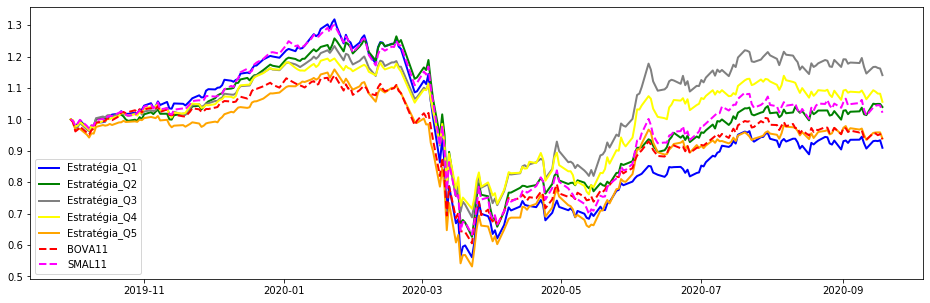

In [63]:
plt.figure(figsize=(16,5))
plt.plot(portfolio_ret_Q1['Ret Acumulado'].loc[start2:end2], marker='', color='blue', linewidth=2, label="Estratégia_Q1")
plt.plot(portfolio_ret_Q2['Ret Acumulado'].loc[start2:end2], marker='', color='green', linewidth=2, label="Estratégia_Q2")
plt.plot(portfolio_ret_Q3['Ret Acumulado'].loc[start2:end2], marker='', color='gray', linewidth=2, label="Estratégia_Q3")
plt.plot(portfolio_ret_Q4['Ret Acumulado'].loc[start2:end2], marker='', color='yellow', linewidth=2, label="Estratégia_Q4")
plt.plot(portfolio_ret_Q5['Ret Acumulado'].loc[start2:end2], marker='', color='orange', linewidth=2, label="Estratégia_Q5")
plt.plot(BOVA11_ret_acum.loc[start2:end2], marker='', color='red', linewidth=2, label="BOVA11", linestyle='dashed')
plt.plot(SMAL11_ret_acum.loc[start2:end2], marker='', color='magenta', linewidth=2, label="SMAL11", linestyle='dashed')
plt.legend() #peso do PI é o dobr P/BV

In [75]:
portfolio_ret_Q1.to_excel('C:/Users/hudsm/Desktop/Q1.xlsx')